# Laboratorium 1


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


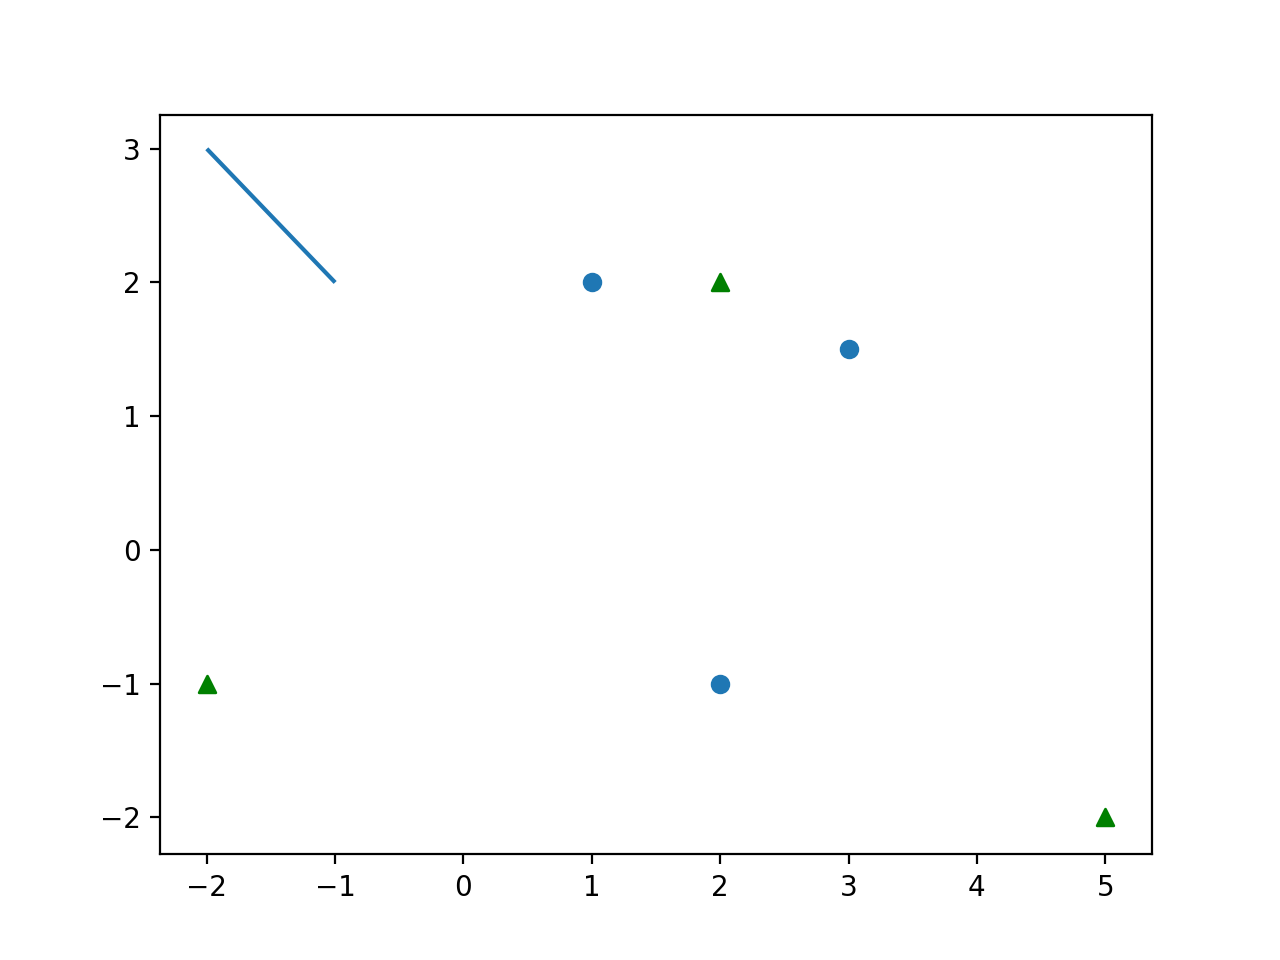

In [3]:
%matplotlib notebook
plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

<IPython.core.display.Javascript object>


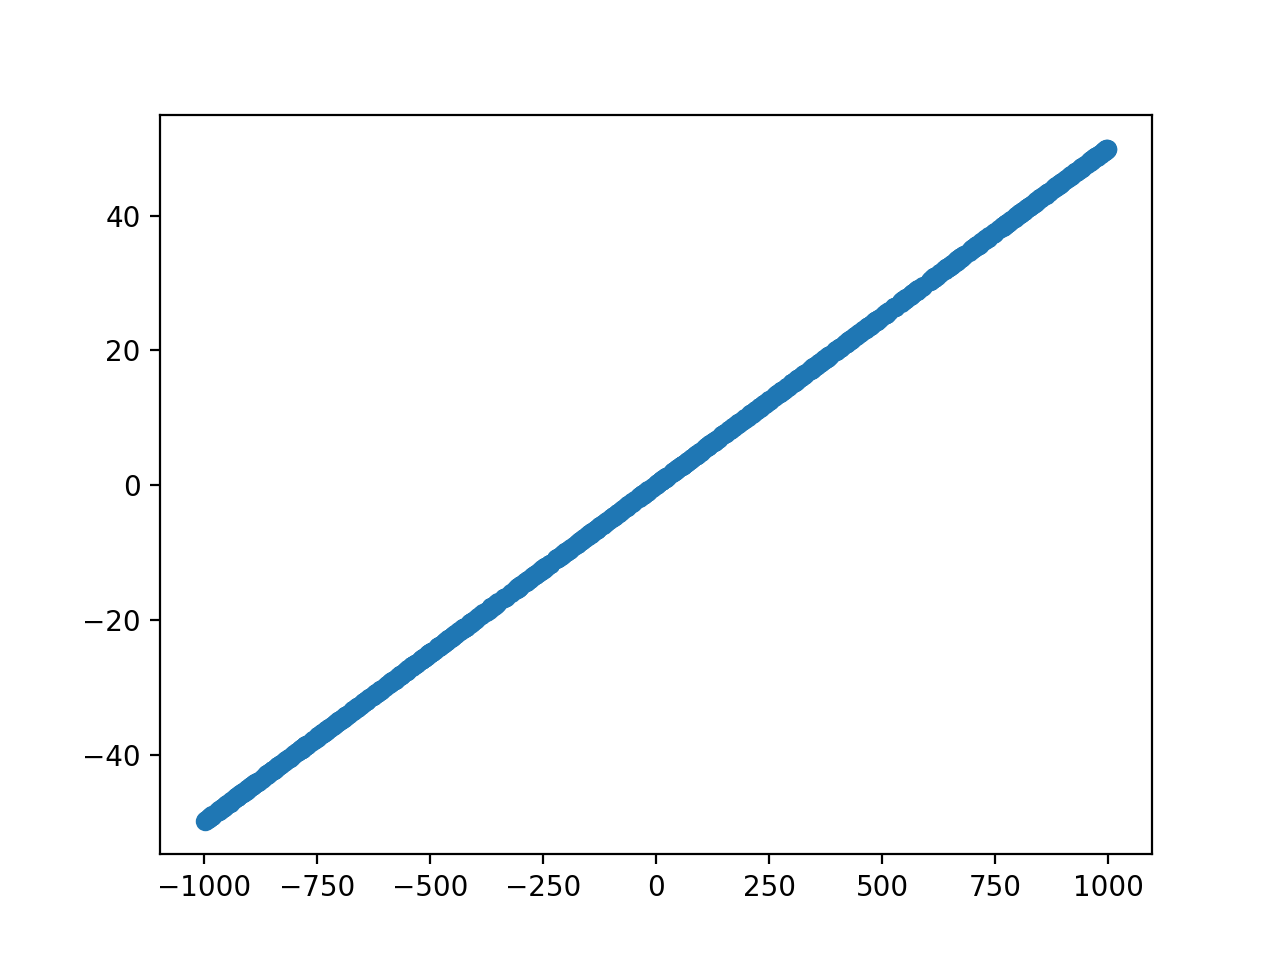

In [4]:
def getPointOnCircle(R):
    t = np.random.rand()
    return np.array([R*np.cos(2*np.pi*t), R*np.sin(2*np.pi*t)])

def getPointsOnLine():
    t = np.random.uniform(-1000, 1000)
    return np.array([t, 0.05*t + 0.05])

set1 = PointsCollection([ np.array([np.random.uniform(-1000, 1000), np.random.uniform(-1000, 1000)]) for i in range(10**5) ])
set2 = PointsCollection([ np.array([np.random.uniform(-10**14, 10**14), np.random.uniform(-10**14, 10**14)]) for i in range(10**5) ])

set3 = PointsCollection([ getPointOnCircle(100) for i in range(1000) ])

a = np.array([-1.0,0.0])
b = np.array([1.0, 0.1])

set4 = PointsCollection([ getPointsOnLine() for i in range(1000) ])

plot = Plot([set4])
plot.draw()

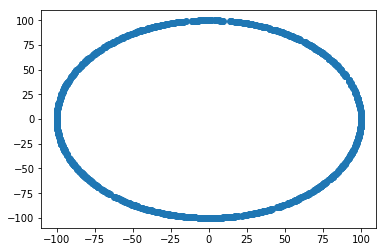

In [5]:
plot = Plot([set3])
plot.draw()

<IPython.core.display.Javascript object>


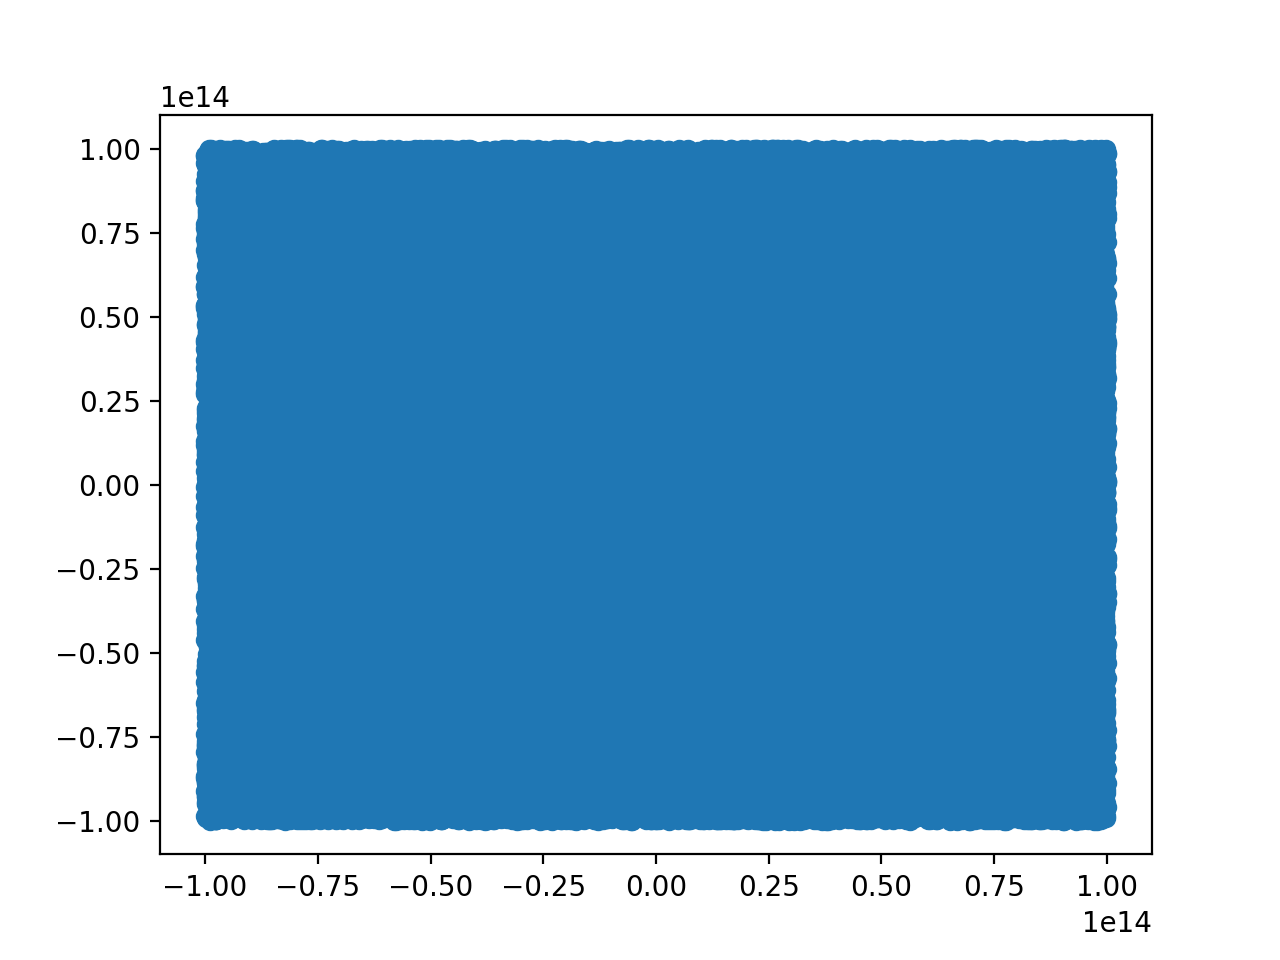

In [5]:
plot = Plot([set2])
plot.draw()

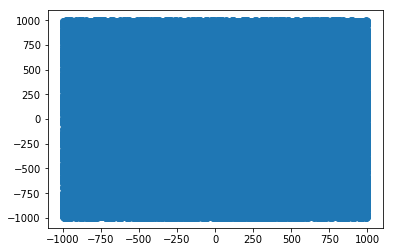

In [7]:
plot = Plot([set1])
plot.draw()

In [7]:
#def det1(a, b, c):
#    return a[0]*(b[1]-c[1]) + a[1]*(c[0]-b[0]) + b[0]*(c[1]-a[1]) 
def det1(a,b,c):
    return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - b[1]*c[0] - a[1]*b[0] - a[0]*c[1]

In [8]:
def det2(a, b, c):
    ap = a-c
    bp = b-c
    return ap[0]*bp[1] - ap[1]*bp[0]

In [9]:
def det3(a, b, c):
    return np.linalg.det( np.hstack( (np.stack((a,b,c)), np.ones((3,1))) ) )

In [10]:
def det4(a,b,c):
    return np.linalg.det(np.stack((a-c, b-c)))

In [11]:
def classify(a,b, eps, point_set, det):
    #left_set = [point_set.points[i] for i in range(len(point_set.points)) if det(a, b, point_set.points[i]) >= eps]
    #eq_set = [point_set.points[i] for i in range(len(point_set.points)) if (det(a, b, point_set.points[i]) < eps) and (det(a,b, point_set.points[i]) > -eps)]
    #right_set = [point_set.points[i] for i in range(len(point_set.points)) if det1(a, b, point_set.points[i]) <= -eps]
    
    left_set = []
    eq_set = []
    right_set = []
    
    for p in point_set.points:
        d = det(a, b, p)
        if(d > eps):
            left_set.append(p)
        elif(d < -eps):
            right_set.append(p)
        else:
            eq_set.append(p)
    
    return(left_set, eq_set, right_set)

In [12]:
def test(a, b, point_set, det, eps, lim_x, num_points):
    left_set, eq_set, right_set = classify(a, b, eps, point_set, det)
    
    print("po lewej stronie: %d" % (len(left_set)))
    print("po prawej stronie: %d" % (len(right_set)))
    print("na prostej: %d" % (len(eq_set)))
    
    plot = Plot([PointsCollection(left_set[:num_points], color='green'), 
                 PointsCollection(eq_set[:num_points], color='yellow'), 
                 PointsCollection(right_set[:num_points], color='red')],
                [LinesCollection([[(-lim_x, -0.05*lim_x), (lim_x, 0.05*lim_x)]])])
    plot.draw()

### Dla zbioru set1 i wyznaczników det1, det2, det3, det4, eps = $10^{-6}$

po lewej stronie: 49701
po prawej stronie: 50299
na prostej: 0


<IPython.core.display.Javascript object>


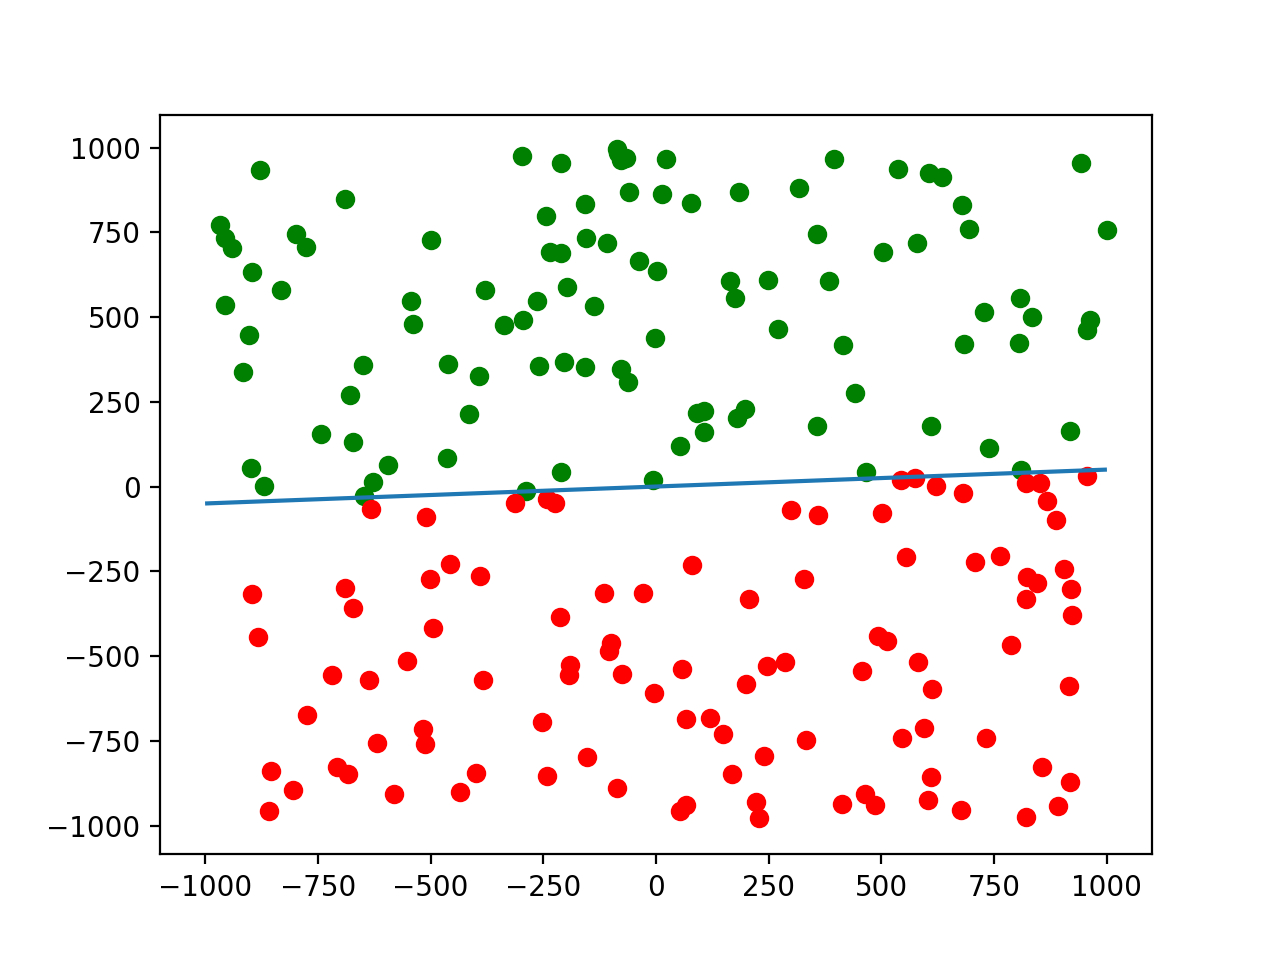

In [13]:
test(a, b, set1, det1, np.float64(1e-6), 1000, 100)

po lewej stronie: 50437
po prawej stronie: 49563
na prostej: 0


<IPython.core.display.Javascript object>


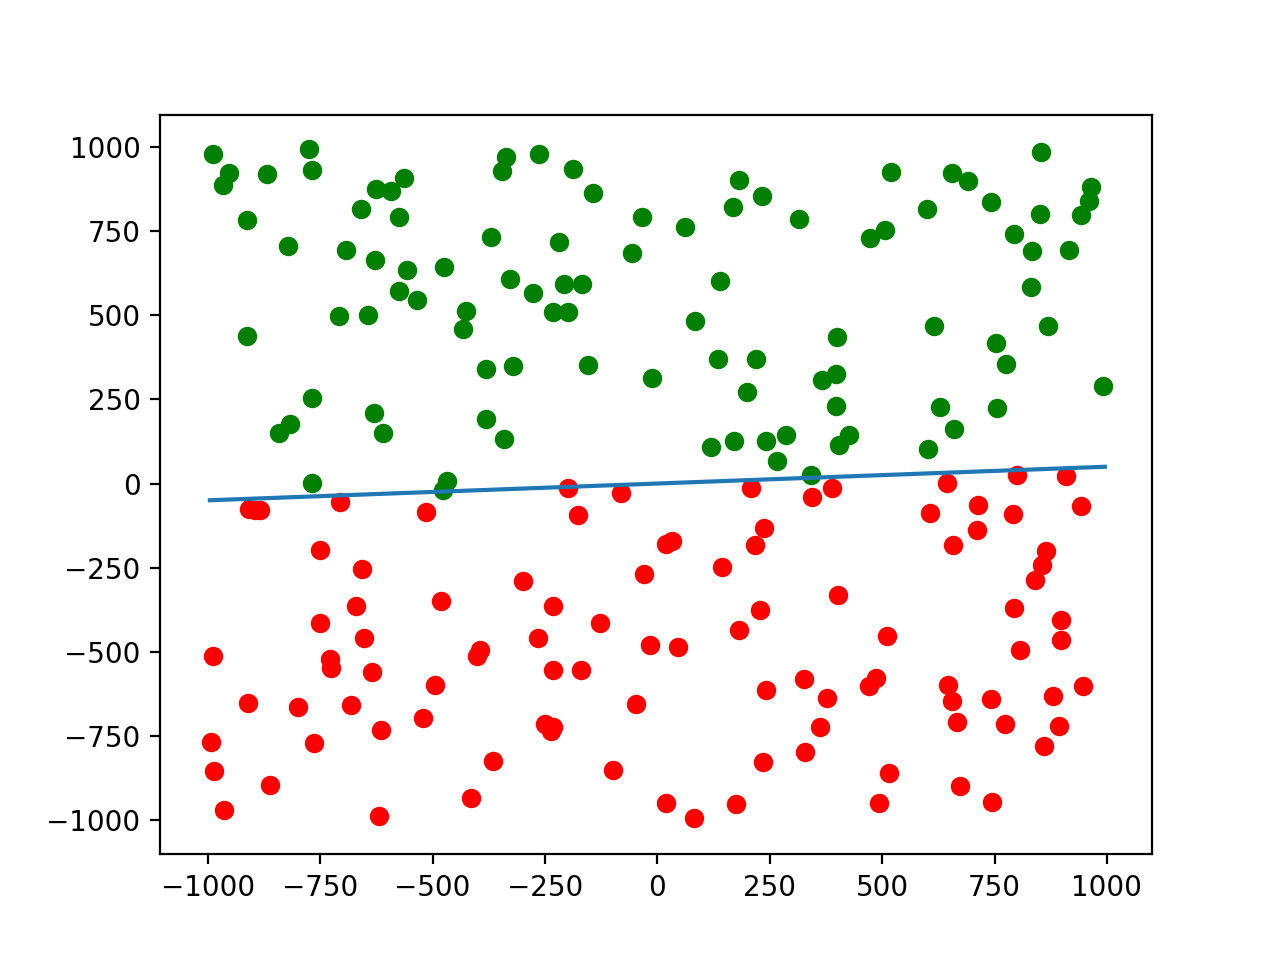

In [39]:
test(a, b, set1, det2, np.float64(1e-6), 1000, 100)

po lewej stronie: 50437
po prawej stronie: 49563
na prostej: 0


<IPython.core.display.Javascript object>


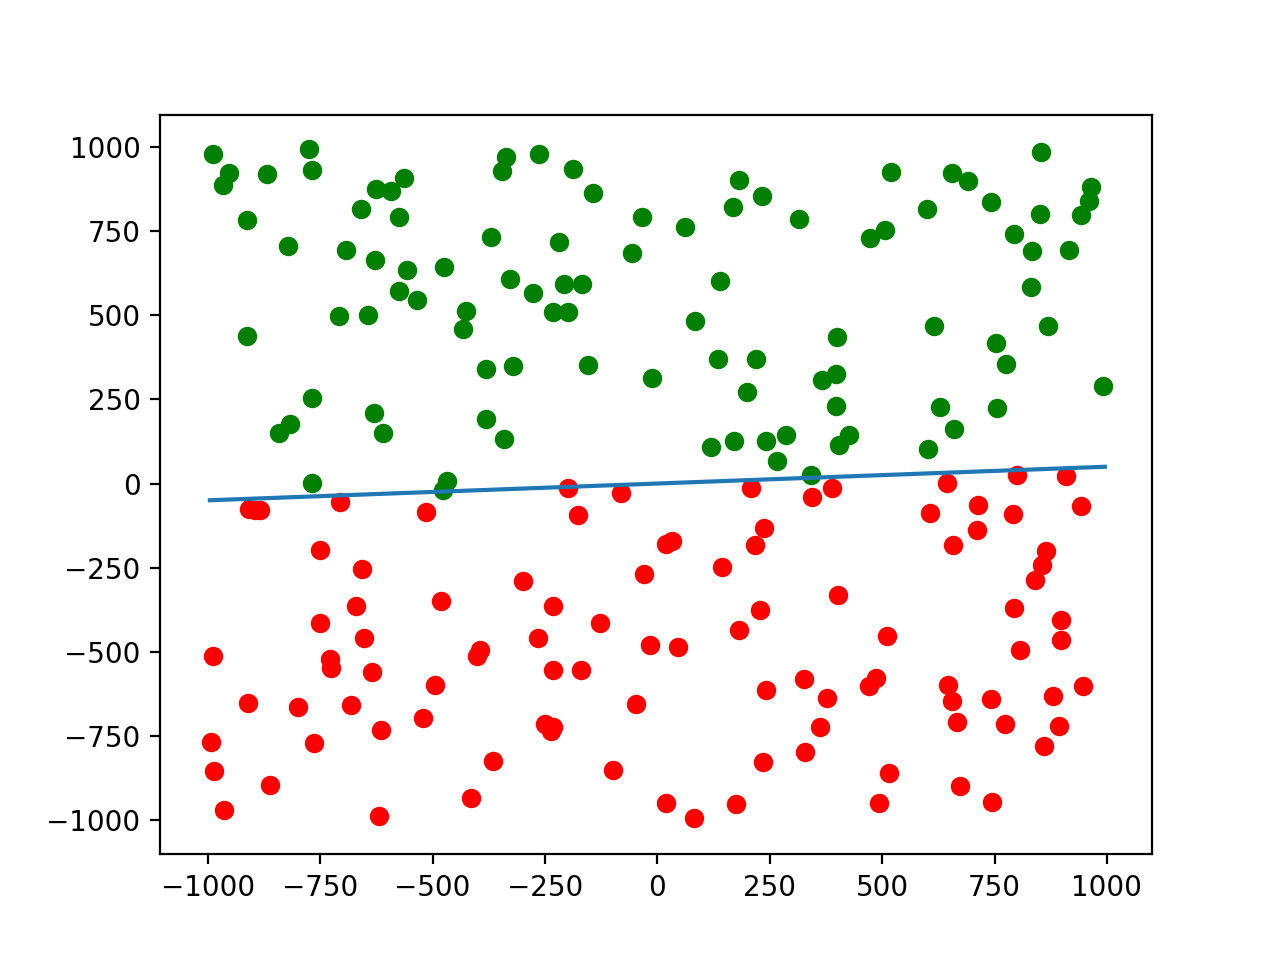

In [56]:
test(a, b, set1, det3, np.float64(1e-6), 1000, 100)

po lewej stronie: 50437
po prawej stronie: 49563
na prostej: 0


<IPython.core.display.Javascript object>


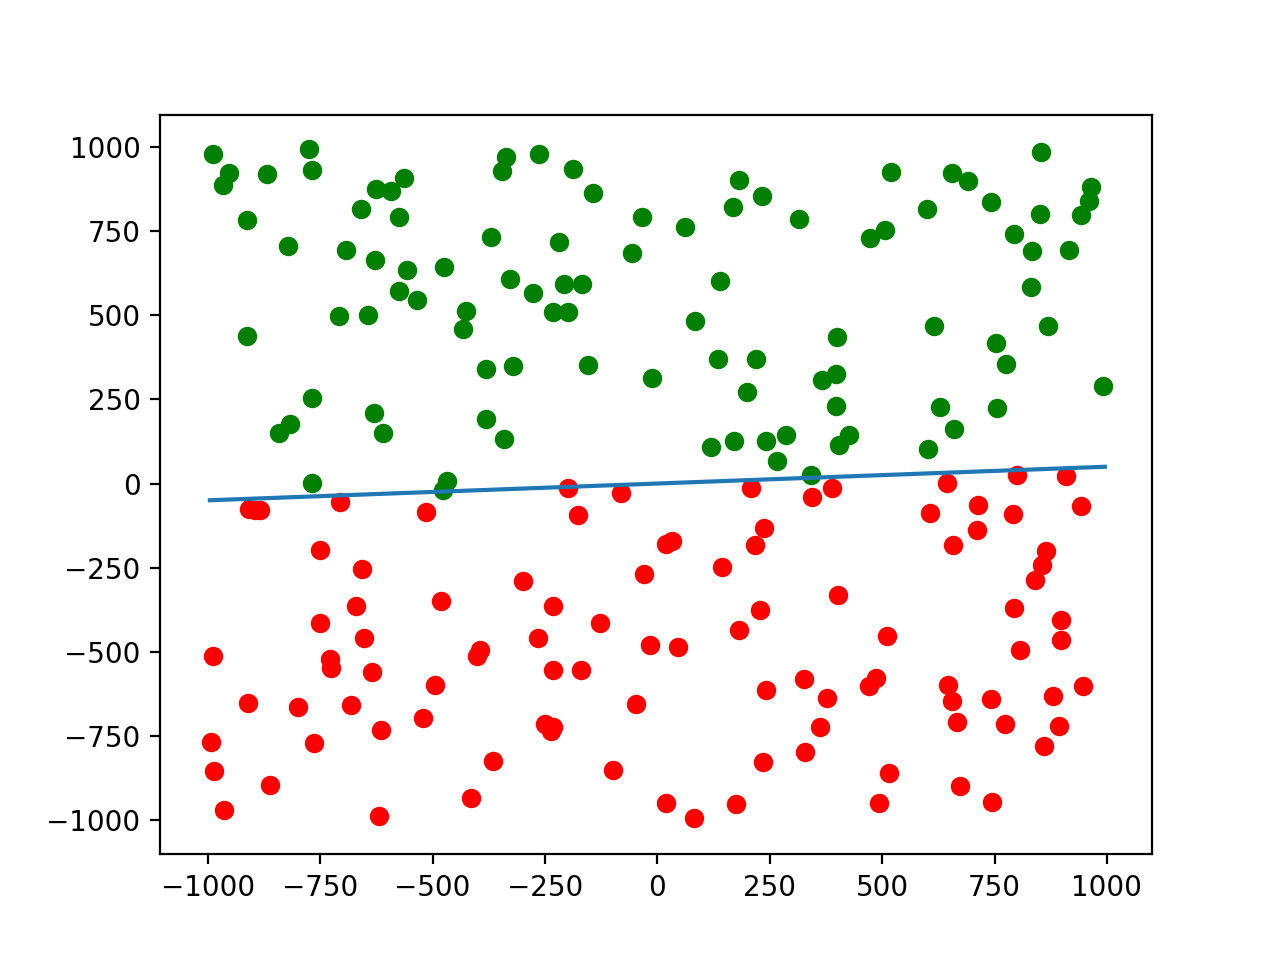

In [57]:
test(a, b, set1, det4, np.float64(1e-6), 1000, 100)

### Dla zbioru set2 i wyznaczników det1, det2, det3, det4, eps = $10^{-6}$

po lewej stronie: 50146
po prawej stronie: 49854
na prostej: 0


<IPython.core.display.Javascript object>


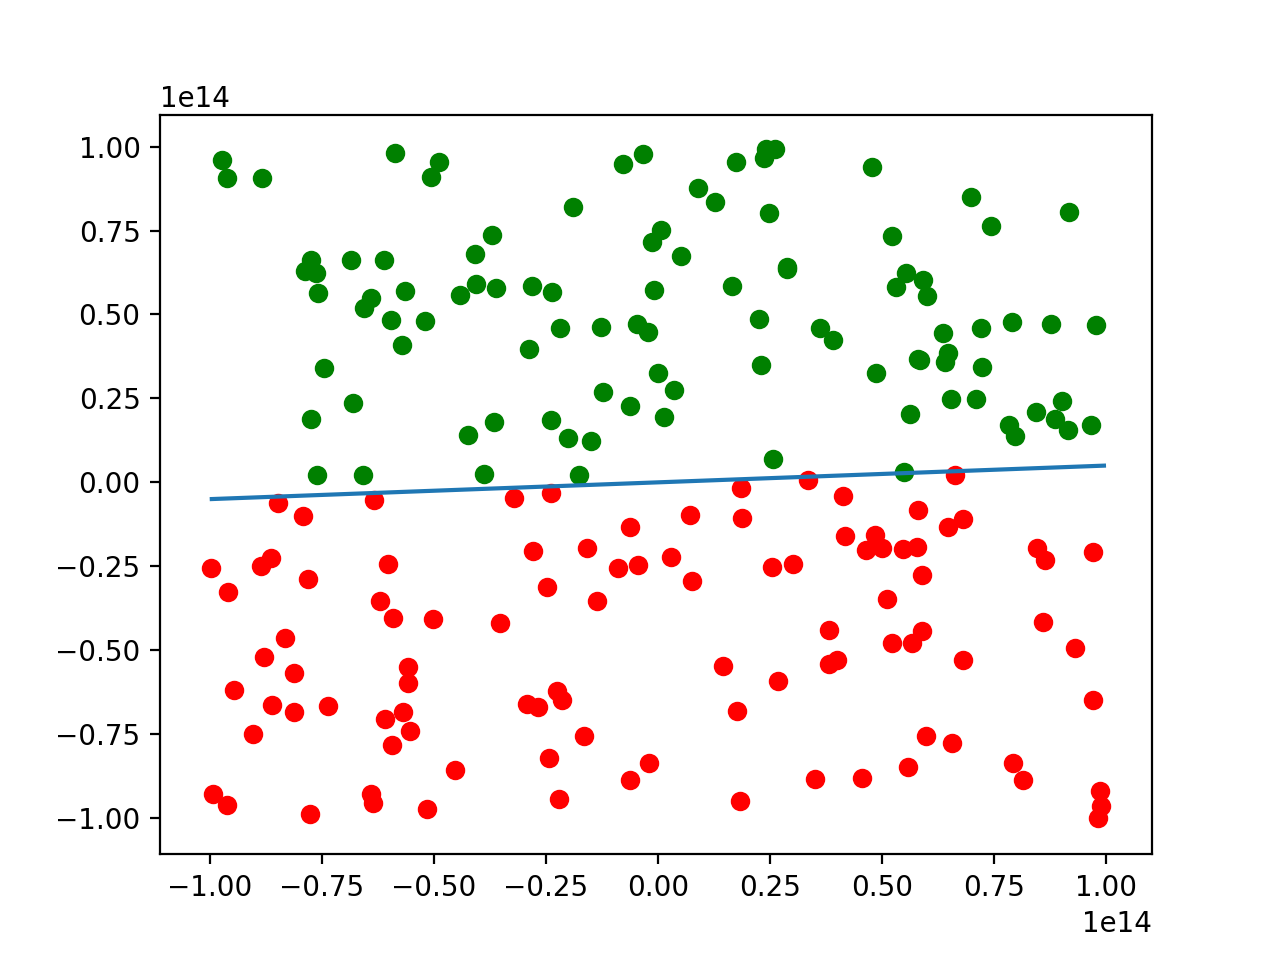

In [58]:
test(a, b, set2, det1, np.float64(1e-6), 10**14, 100)

po lewej stronie: 50140
po prawej stronie: 49848
na prostej: 12


<IPython.core.display.Javascript object>


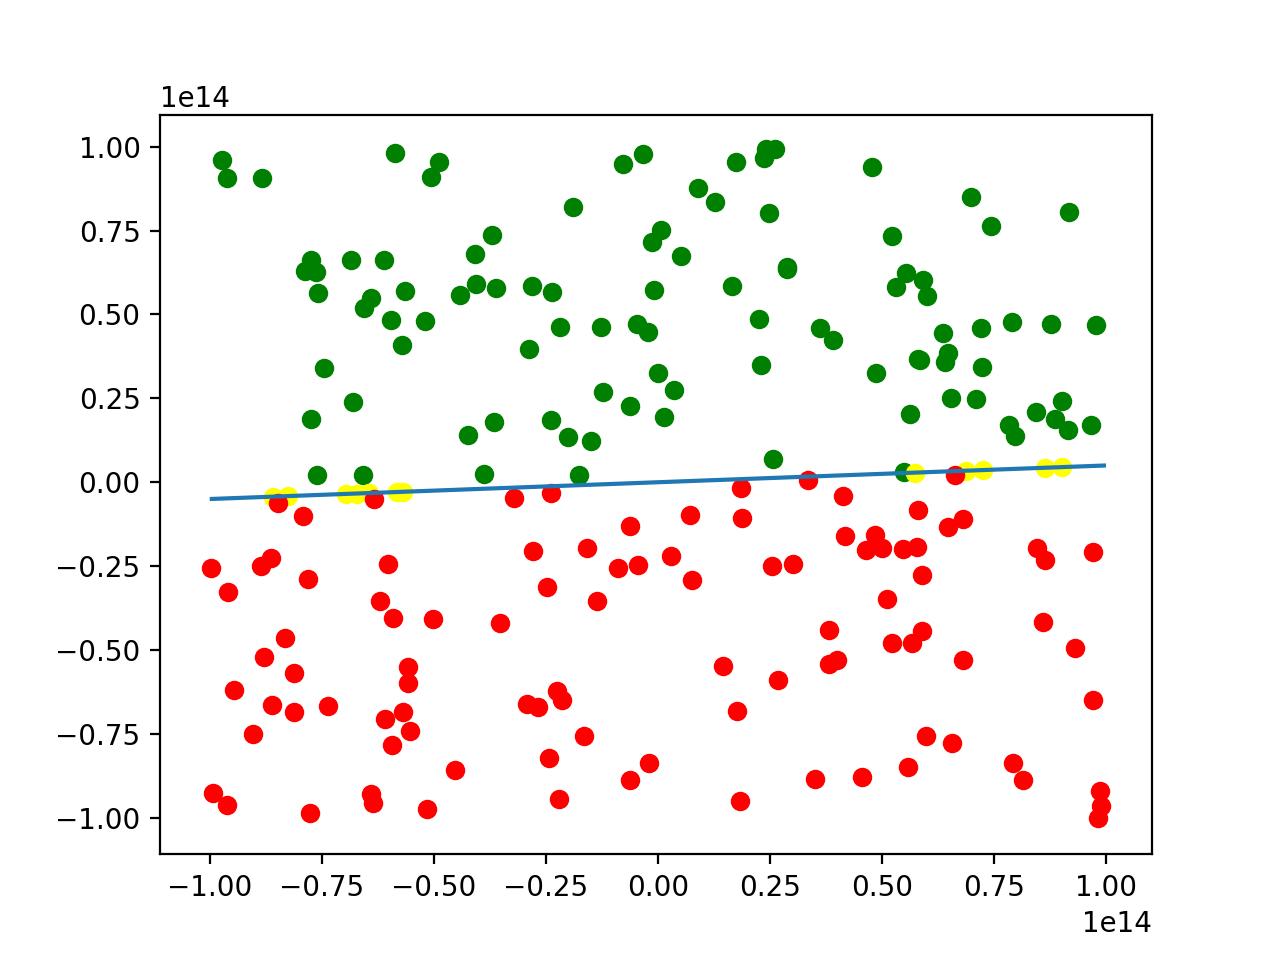

In [101]:
test(a, b, set2, det2, np.float64(0.0), 10**14, 100)

po lewej stronie: 50146
po prawej stronie: 49854
na prostej: 0


<IPython.core.display.Javascript object>


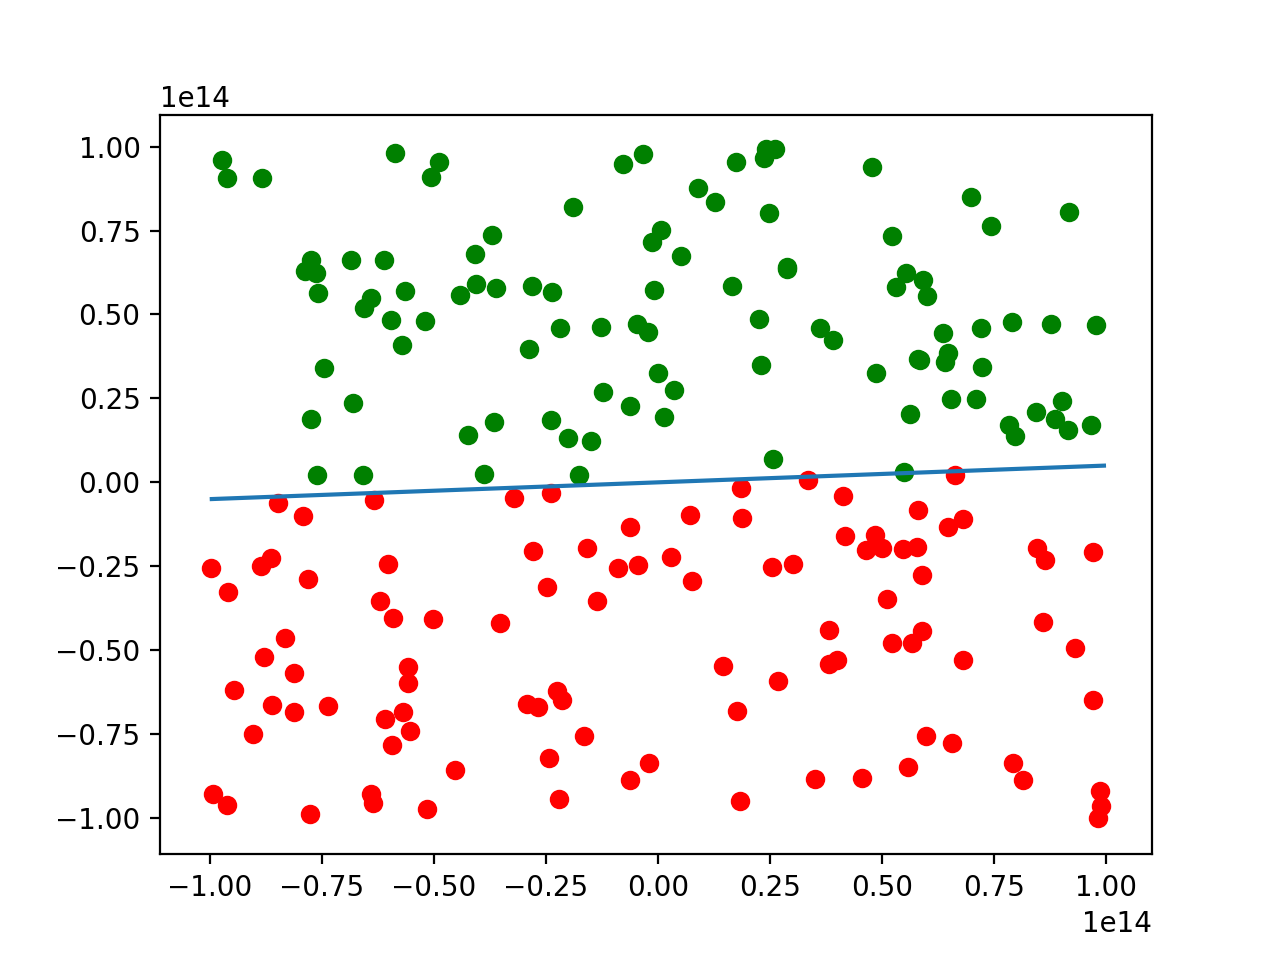

In [108]:
test(a, b, set2, det3, np.float64(1e-6), 10**14, 100)

po lewej stronie: 50140
po prawej stronie: 49849
na prostej: 11


<IPython.core.display.Javascript object>


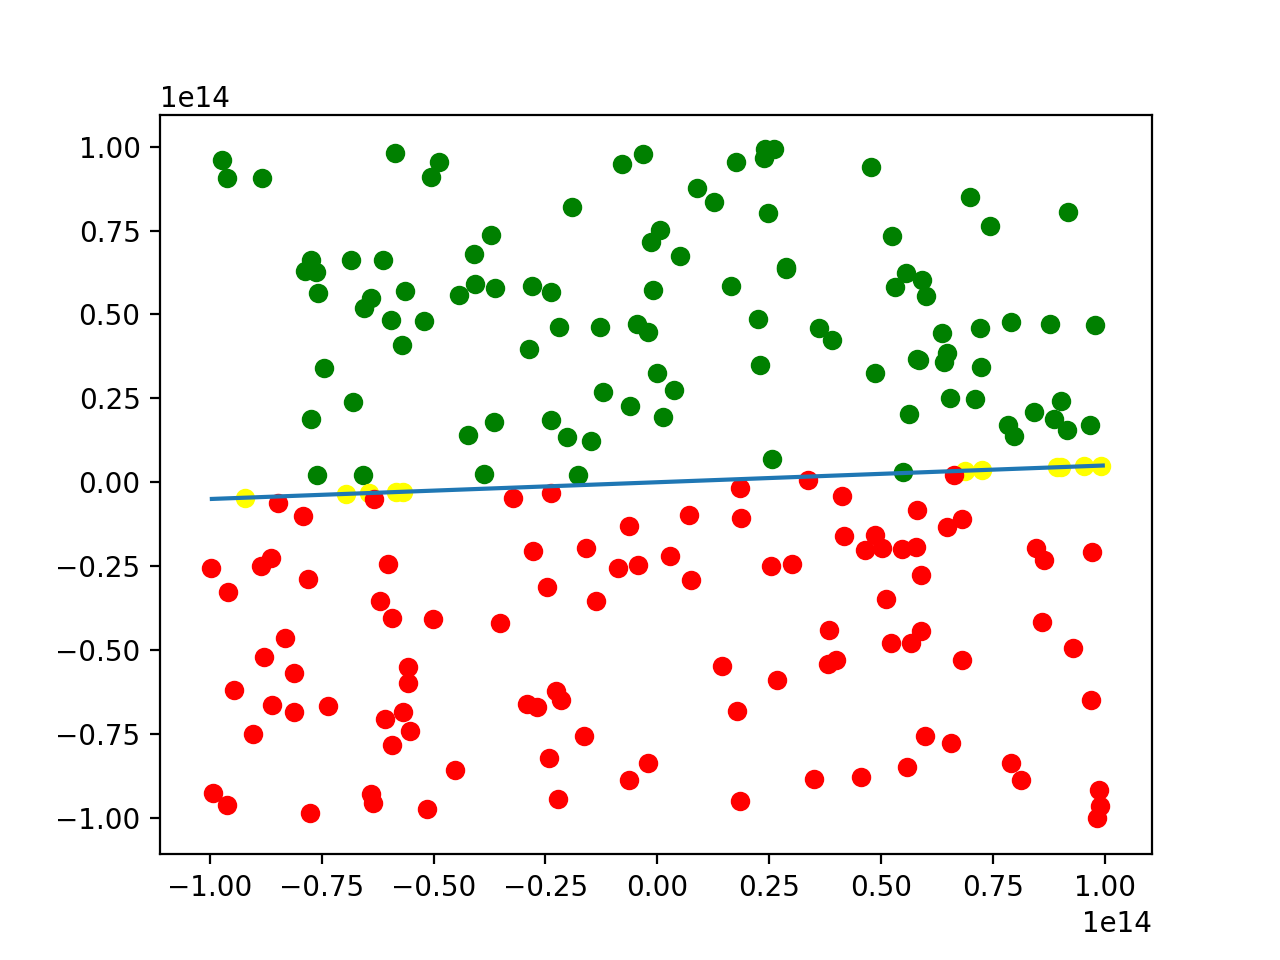

In [105]:
test(a, b, set2, det4, np.float64(1e-6), 10**14, 100)

### Dla zbioru set2 i wyznaczników det1, det2, det3, det4, eps = 0

po lewej stronie: 50146
po prawej stronie: 49854
na prostej: 0


<IPython.core.display.Javascript object>


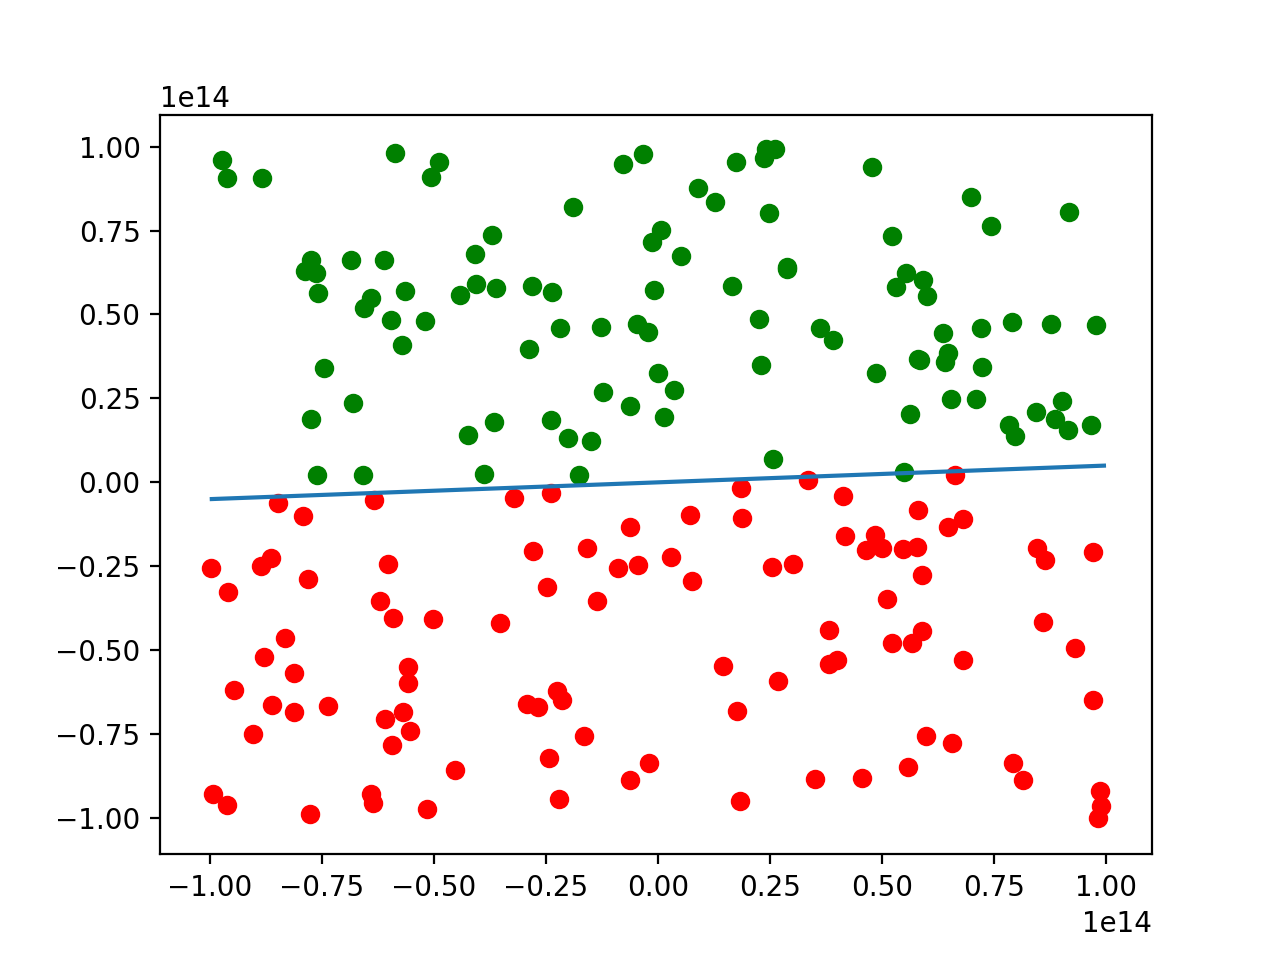

In [109]:
test(a, b, set2, det1, np.float64(0.0), 10**14, 100)

po lewej stronie: 50140
po prawej stronie: 49848
na prostej: 12


<IPython.core.display.Javascript object>


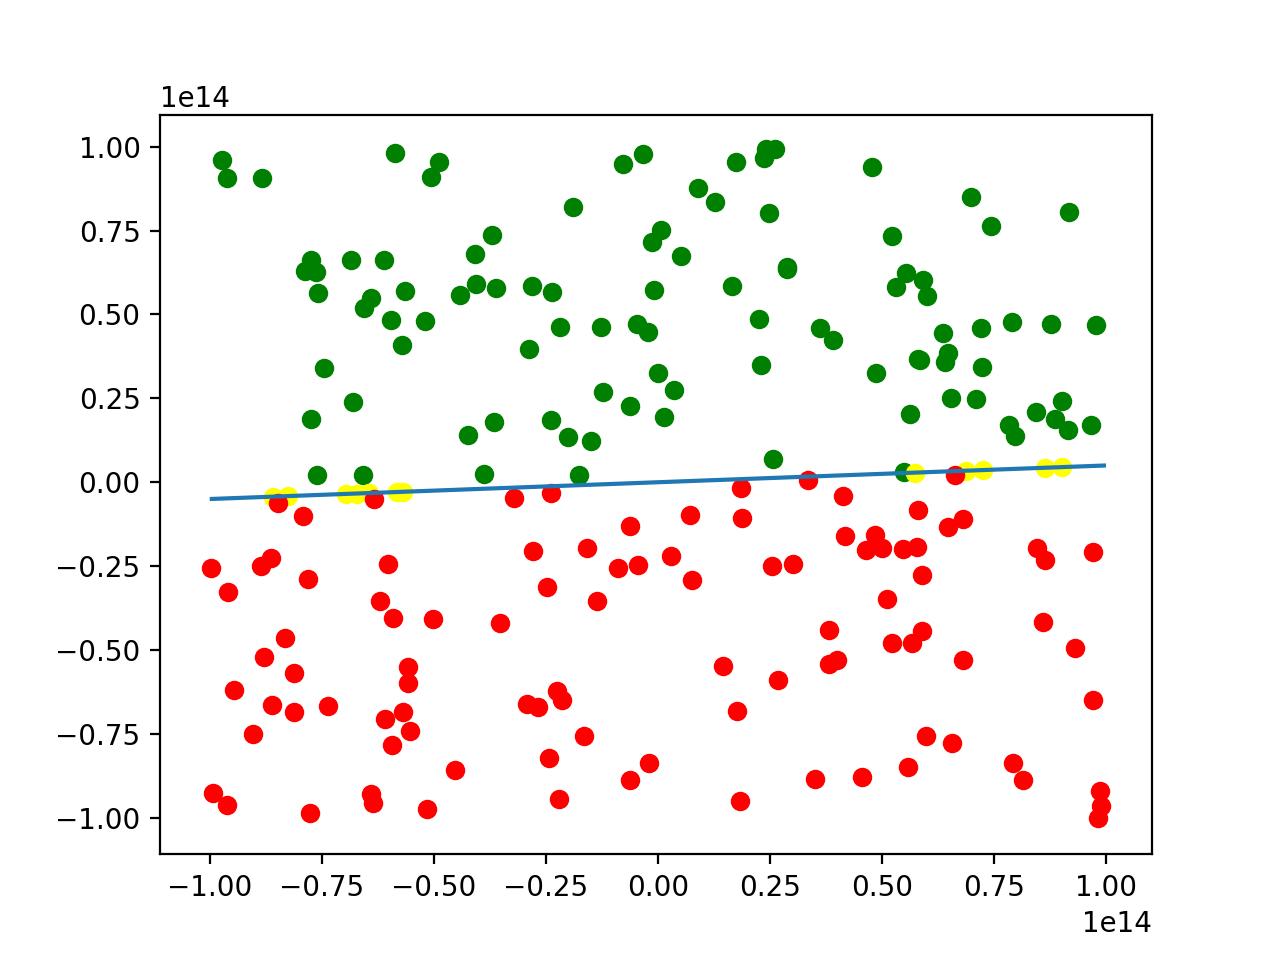

In [110]:
test(a, b, set2, det2, np.float64(0.0), 10**14, 100)

po lewej stronie: 50146
po prawej stronie: 49854
na prostej: 0


<IPython.core.display.Javascript object>


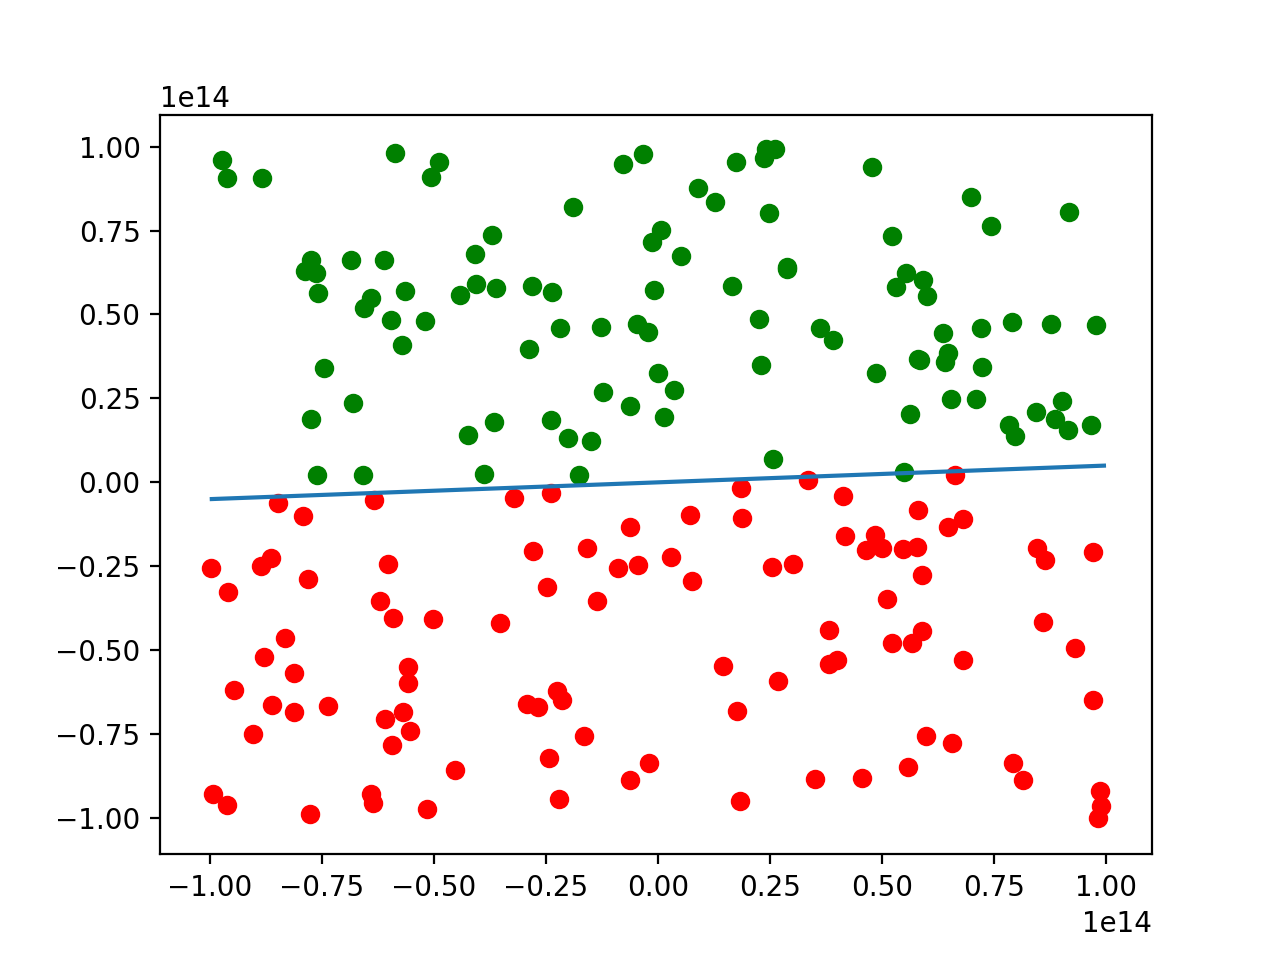

In [111]:
test(a, b, set2, det3, np.float64(0.0), 10**14, 100)

po lewej stronie: 50140
po prawej stronie: 49849
na prostej: 11


<IPython.core.display.Javascript object>


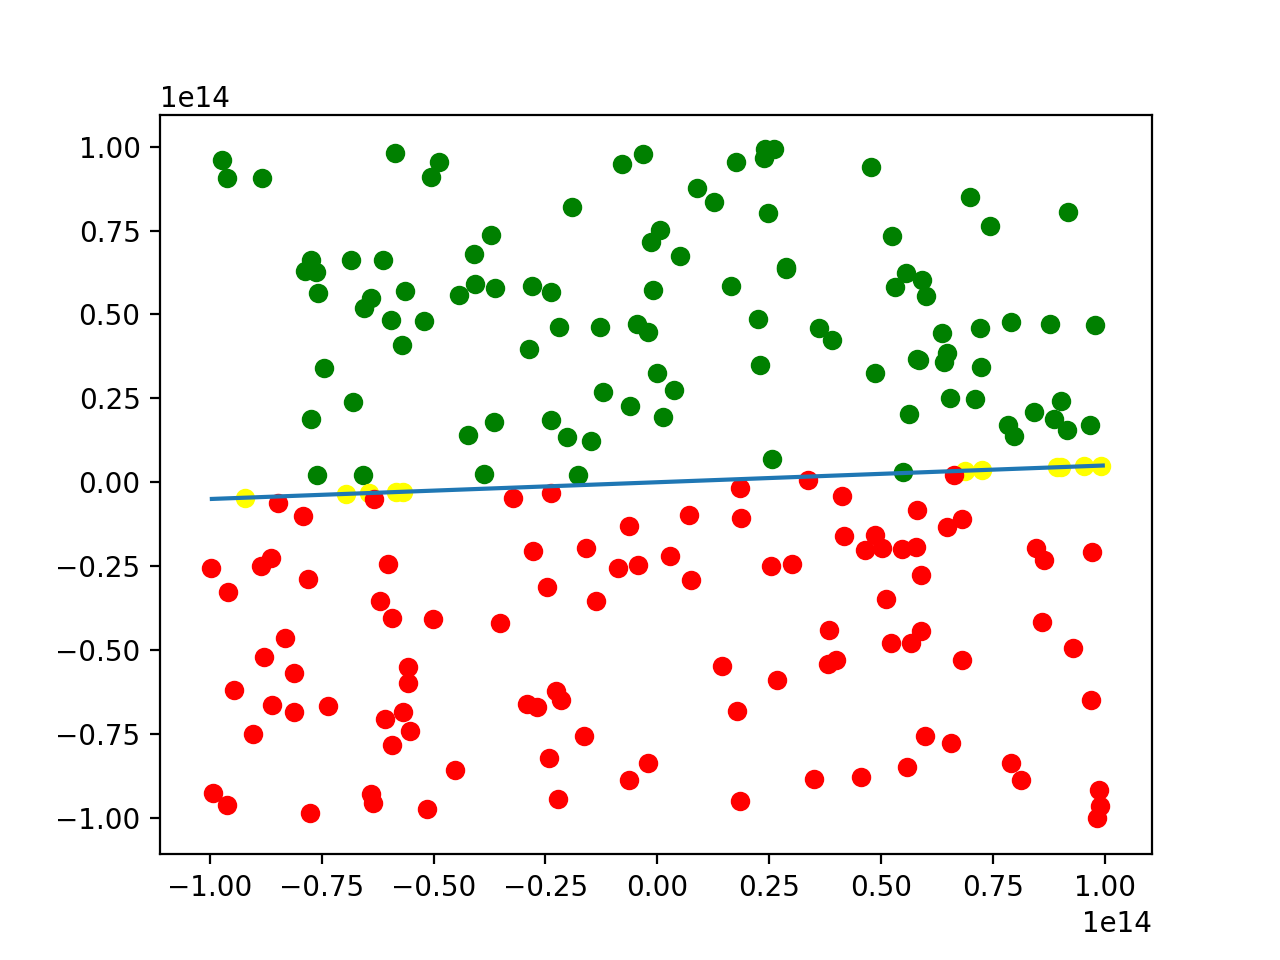

In [112]:
test(a, b, set2, det4, np.float64(0.0), 10**14, 100)

### Dla zbioru set3 i wyznaczników det1, det2, det3, det4, eps = $10^{-6}$

po lewej stronie: 499
po prawej stronie: 501
na prostej: 0


<IPython.core.display.Javascript object>


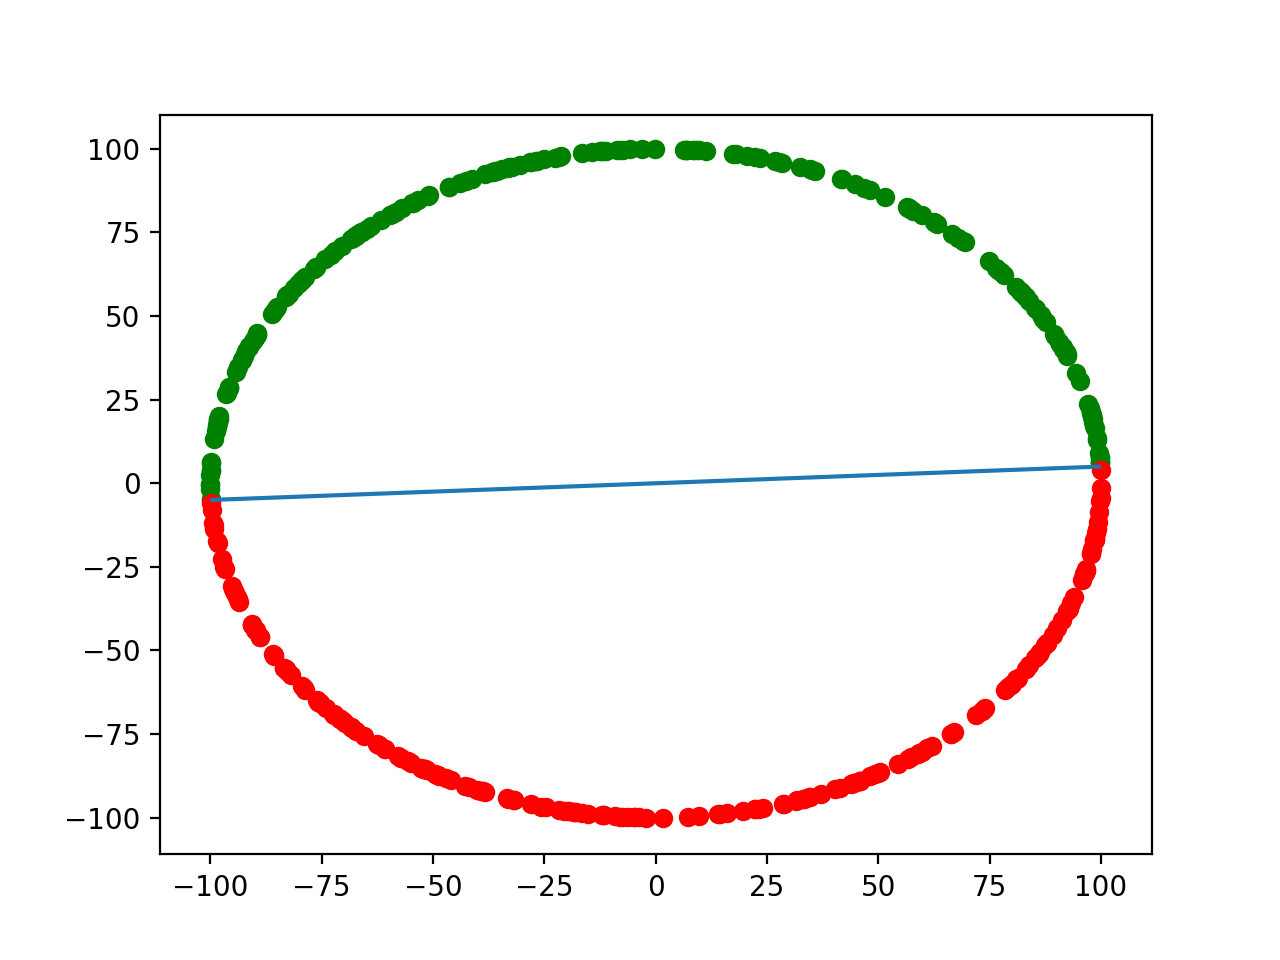

In [67]:
test(a, b, set3, det1, np.float64(1e-6), 100, 200)

po lewej stronie: 499
po prawej stronie: 501
na prostej: 0


<IPython.core.display.Javascript object>


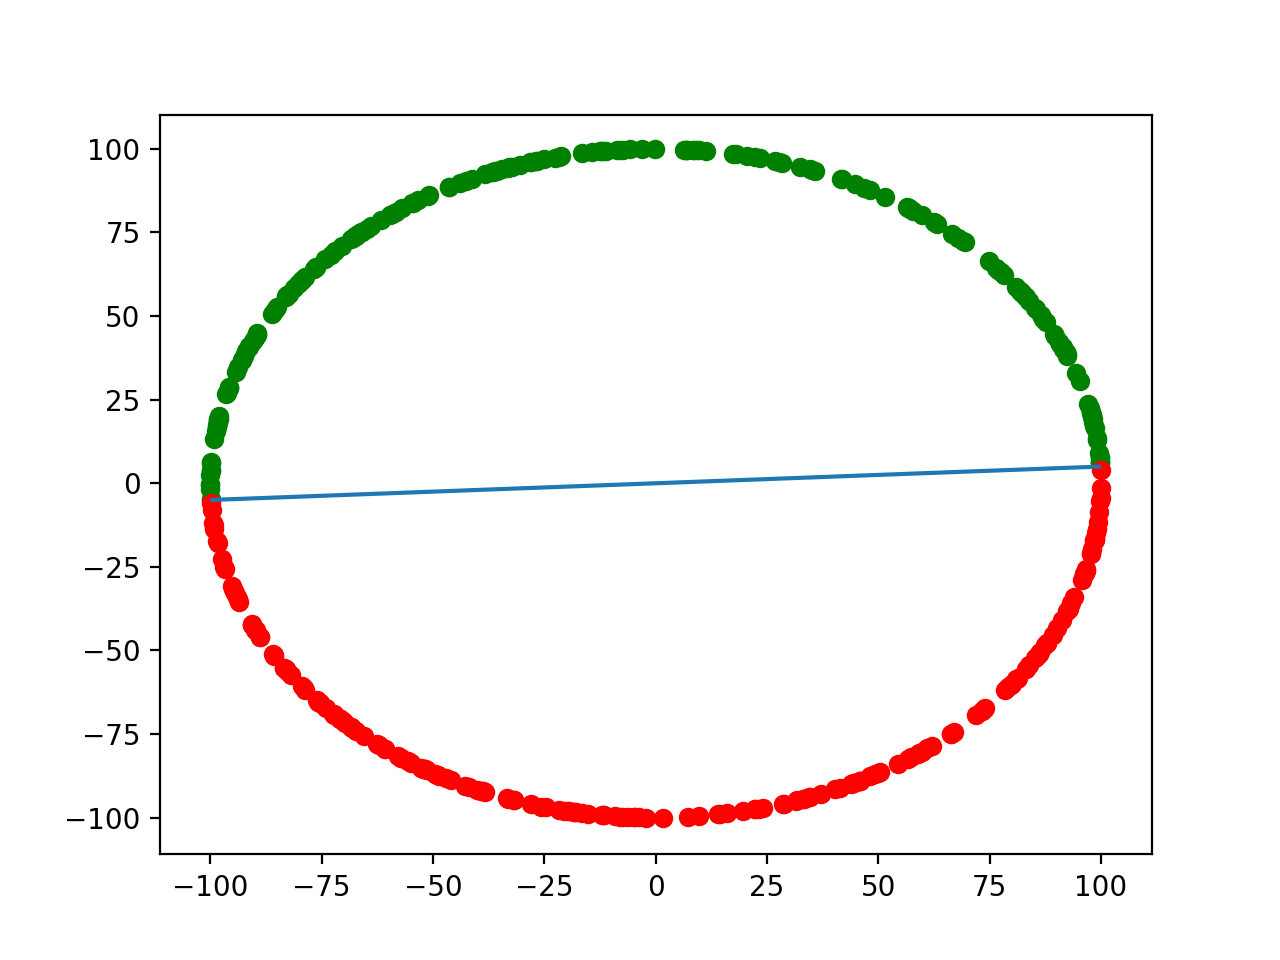

In [68]:
test(a, b, set3, det2, np.float64(1e-6), 100, 200)

po lewej stronie: 499
po prawej stronie: 501
na prostej: 0


<IPython.core.display.Javascript object>


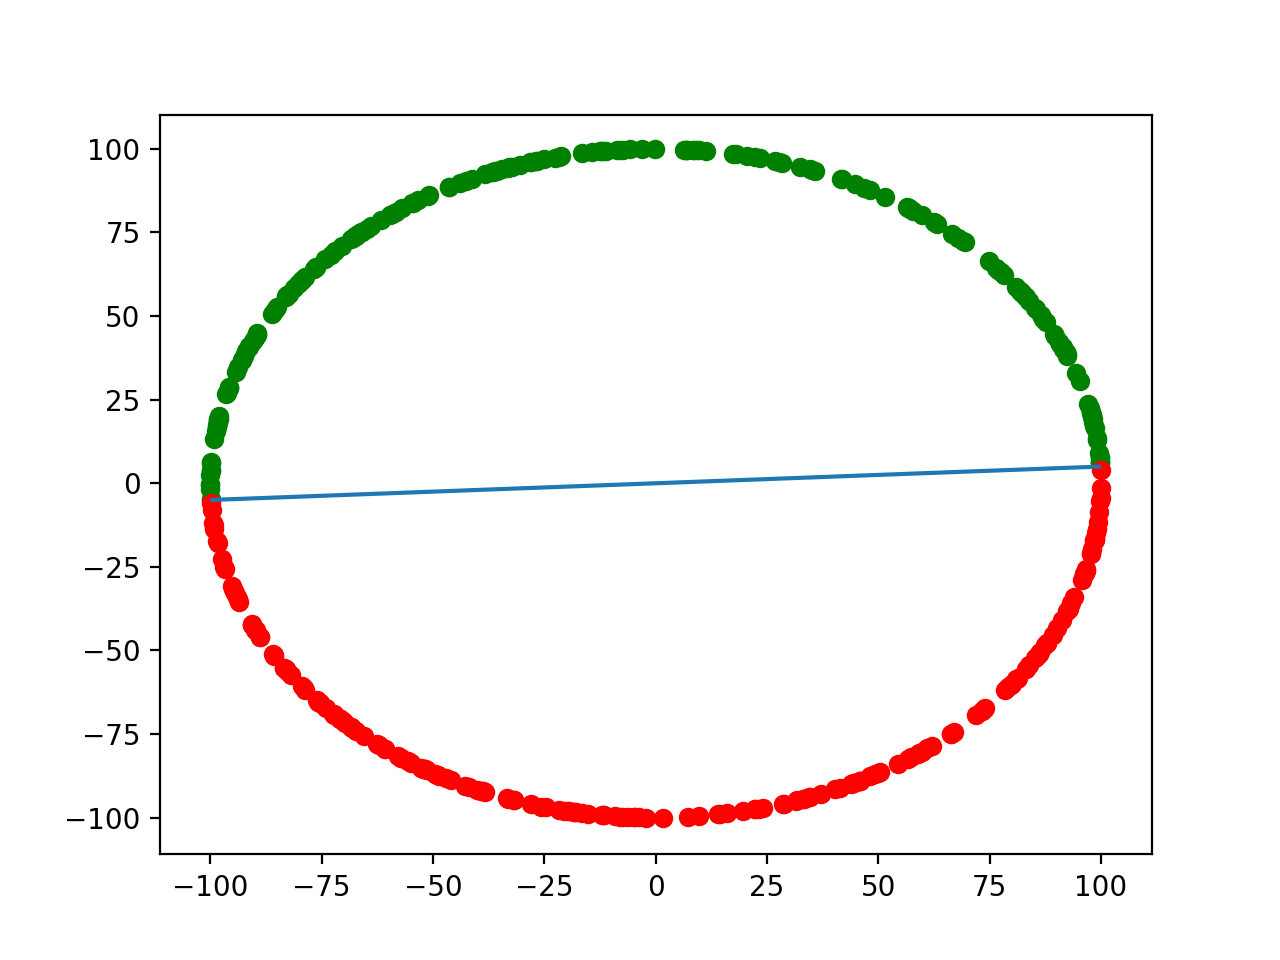

In [69]:
test(a, b, set3, det3, np.float64(1e-6), 100, 200)

po lewej stronie: 499
po prawej stronie: 501
na prostej: 0


<IPython.core.display.Javascript object>


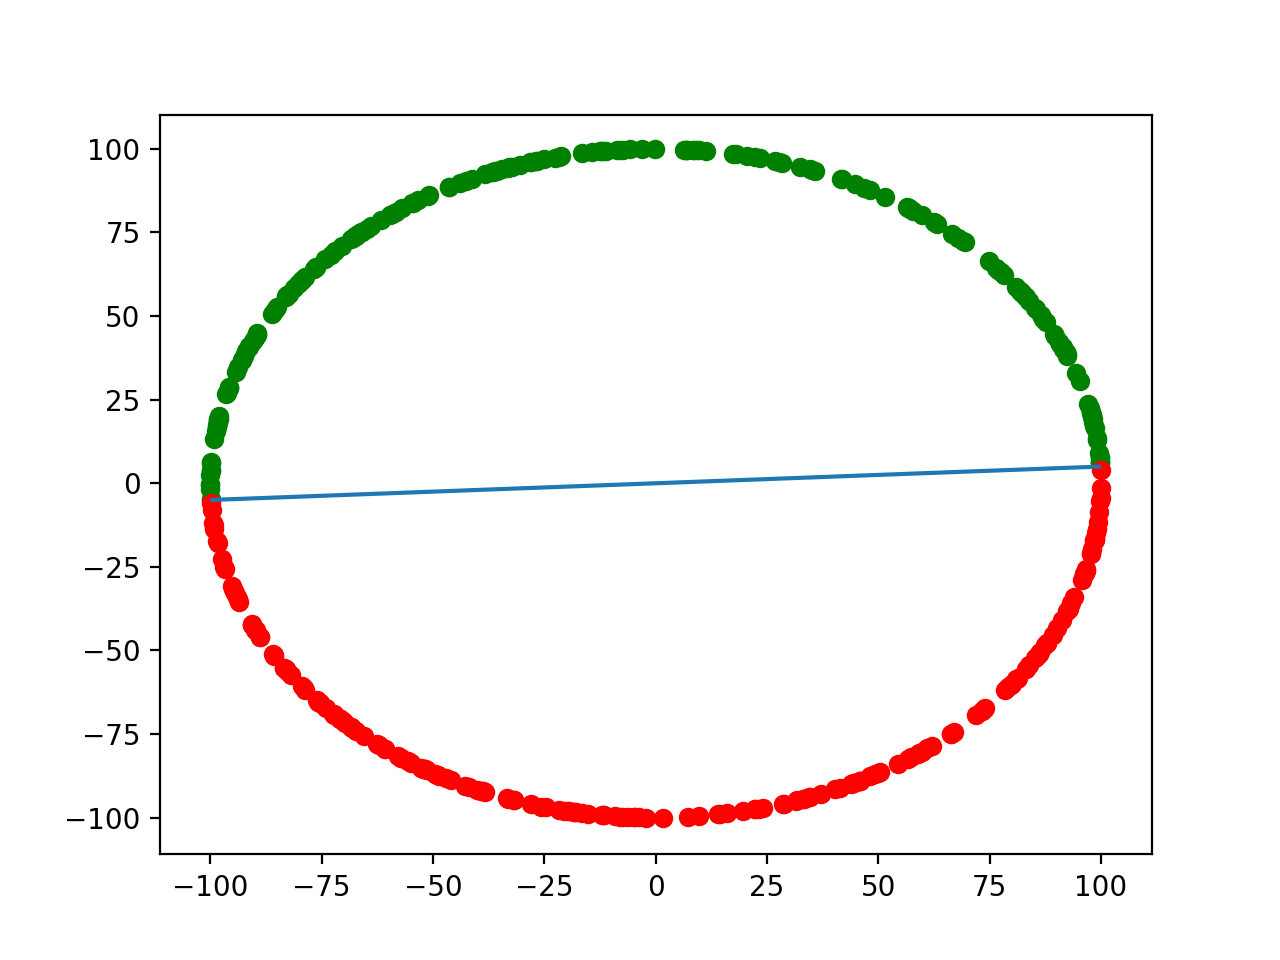

In [70]:
test(a, b, set3, det4, np.float64(1e-6), 100, 200)

### Dla zbioru set4 i wyznaczników det1, det2, det3, det4, eps = $10^{-6}$

po lewej stronie: 0
po prawej stronie: 0
na prostej: 1000


<IPython.core.display.Javascript object>


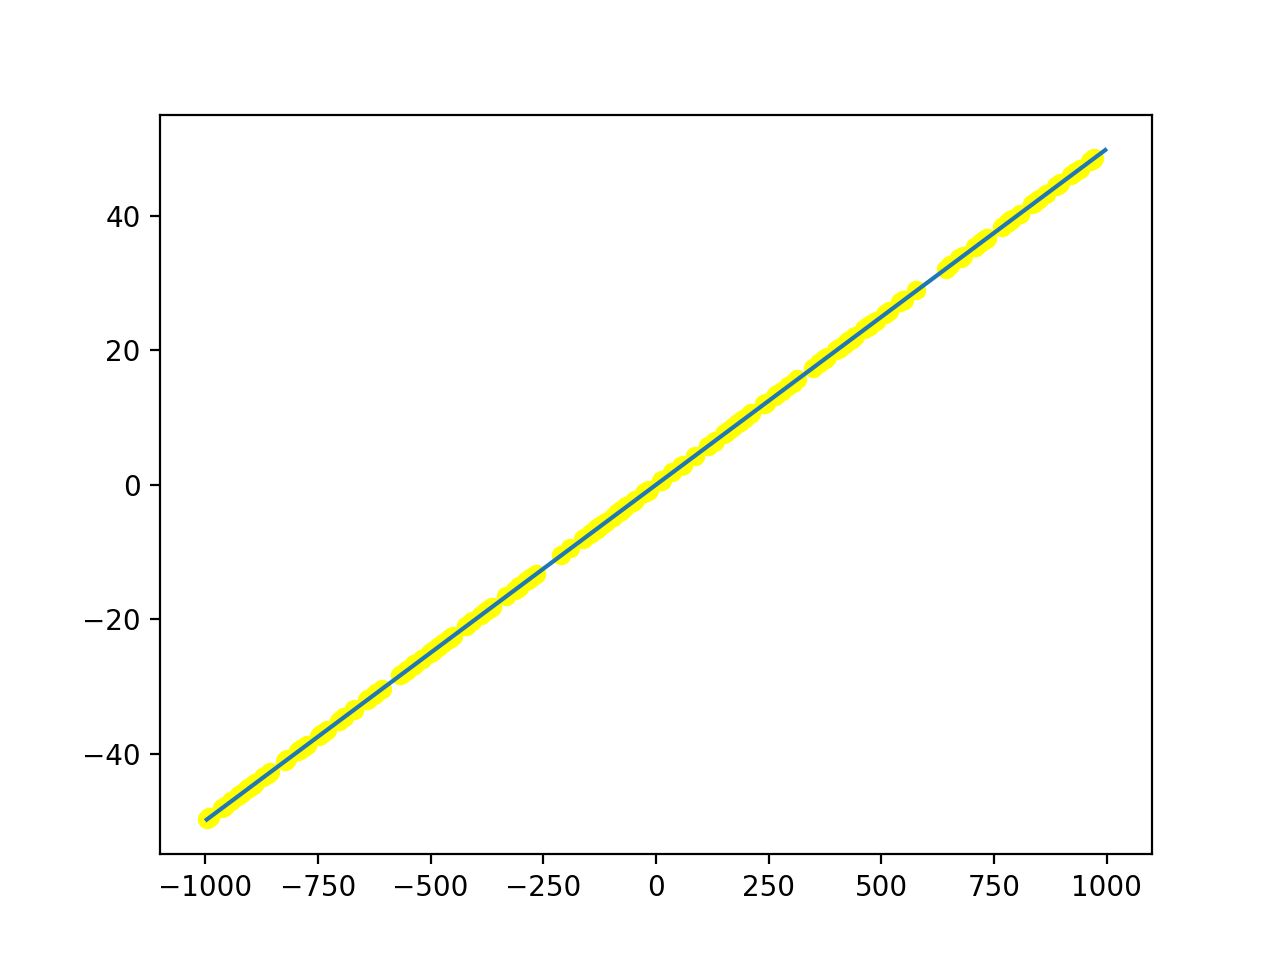

In [14]:
test(a, b, set4, det1, np.float64(1e-6), 1000, 200)

po lewej stronie: 0
po prawej stronie: 0
na prostej: 1000


<IPython.core.display.Javascript object>


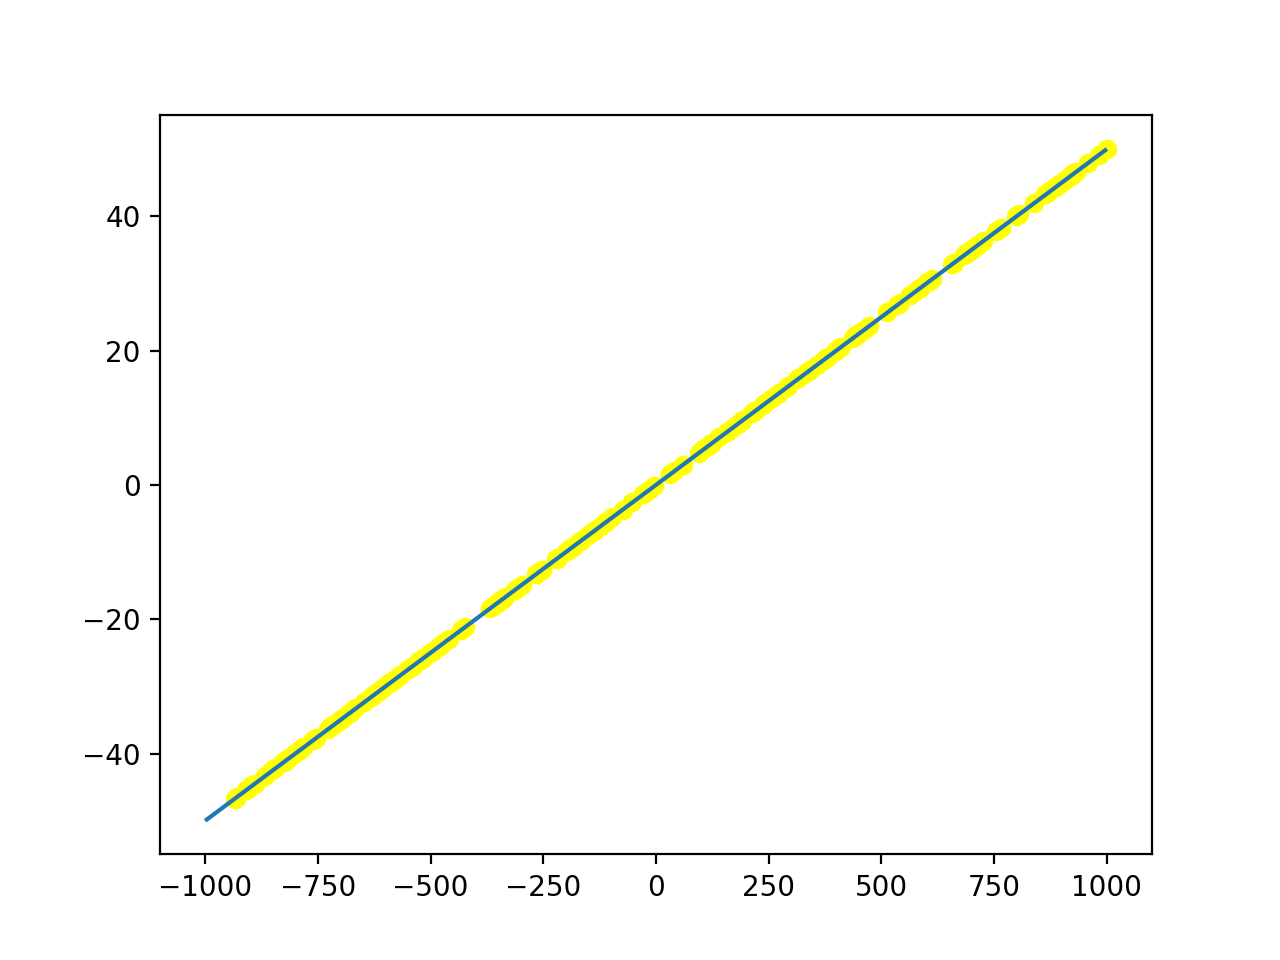

In [72]:
test(a, b, set4, det2, np.float64(1e-6), 1000, 200)

po lewej stronie: 0
po prawej stronie: 0
na prostej: 1000


<IPython.core.display.Javascript object>


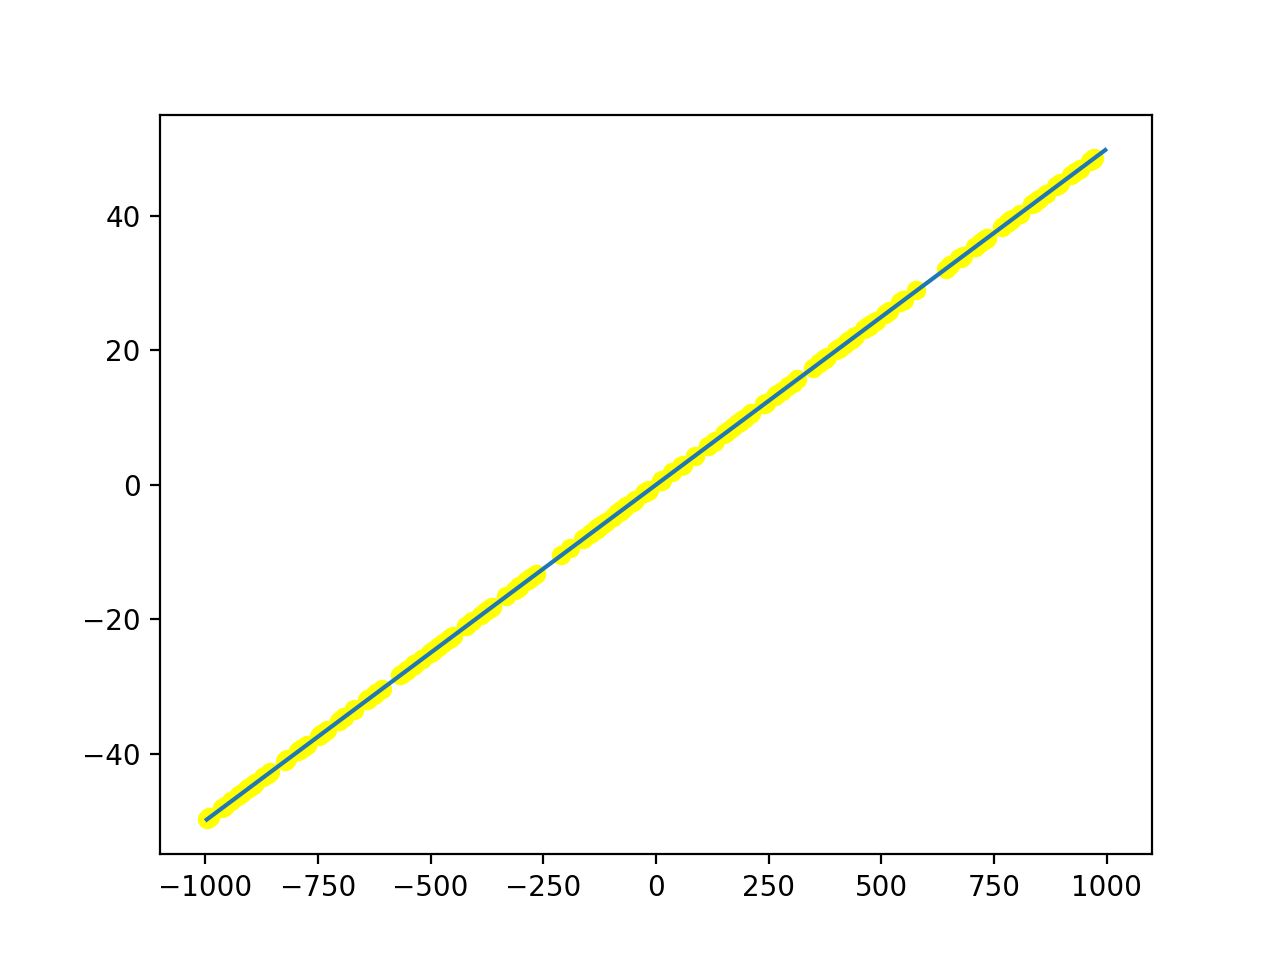

In [15]:
test(a, b, set4, det3, np.float64(1e-6), 1000, 200)

po lewej stronie: 0
po prawej stronie: 0
na prostej: 1000


<IPython.core.display.Javascript object>


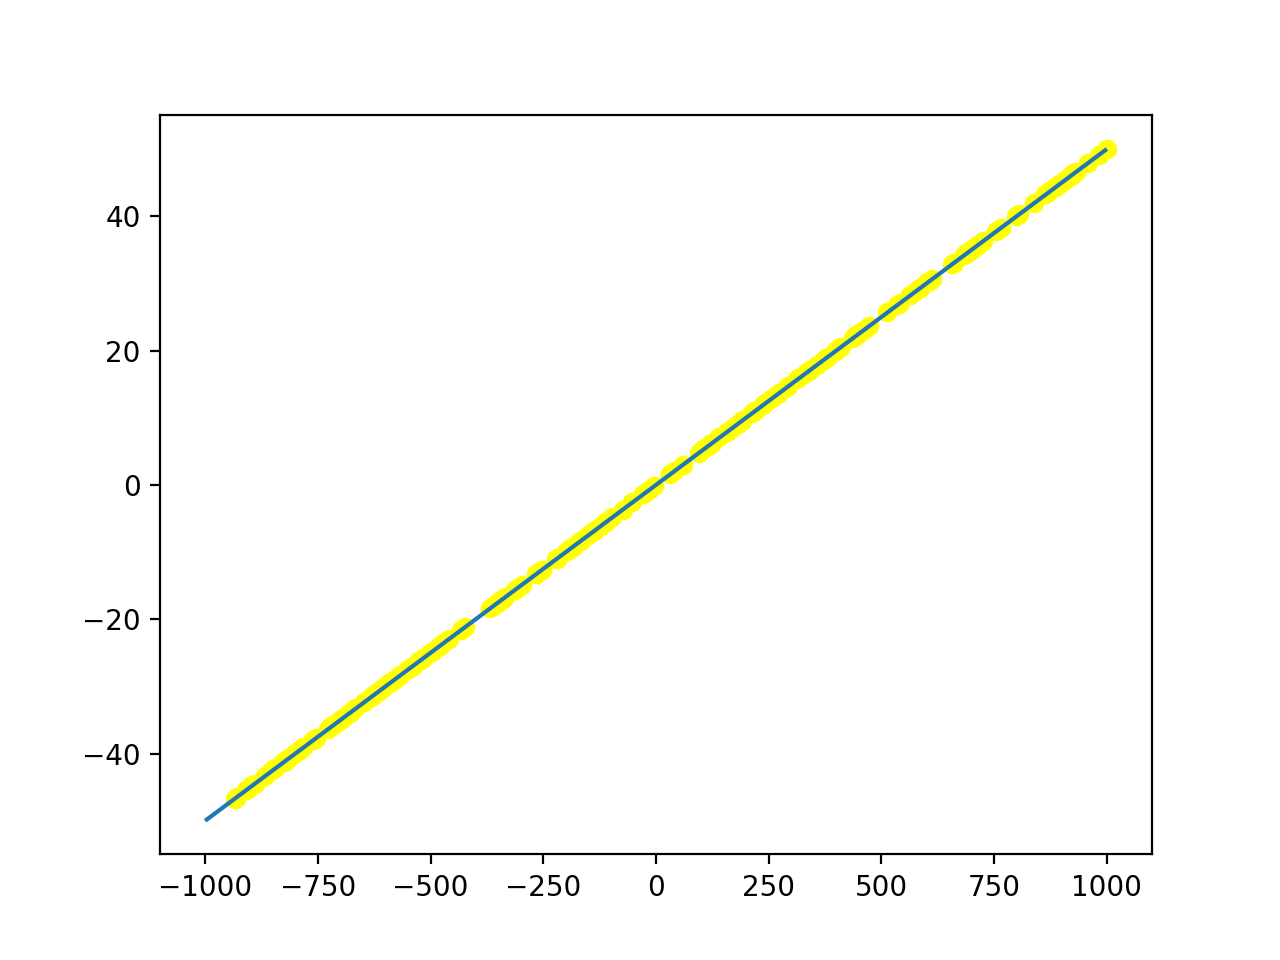

In [74]:
test(a, b, set4, det4, np.float64(1e-6), 1000, 200)

## Wykresy dla różnych wartości epsilon i wyznaczników na zbiorze punktów na prostej

#### eps = $10^{-10}$

po lewej stronie: 0
po prawej stronie: 0
na prostej: 1000


<IPython.core.display.Javascript object>


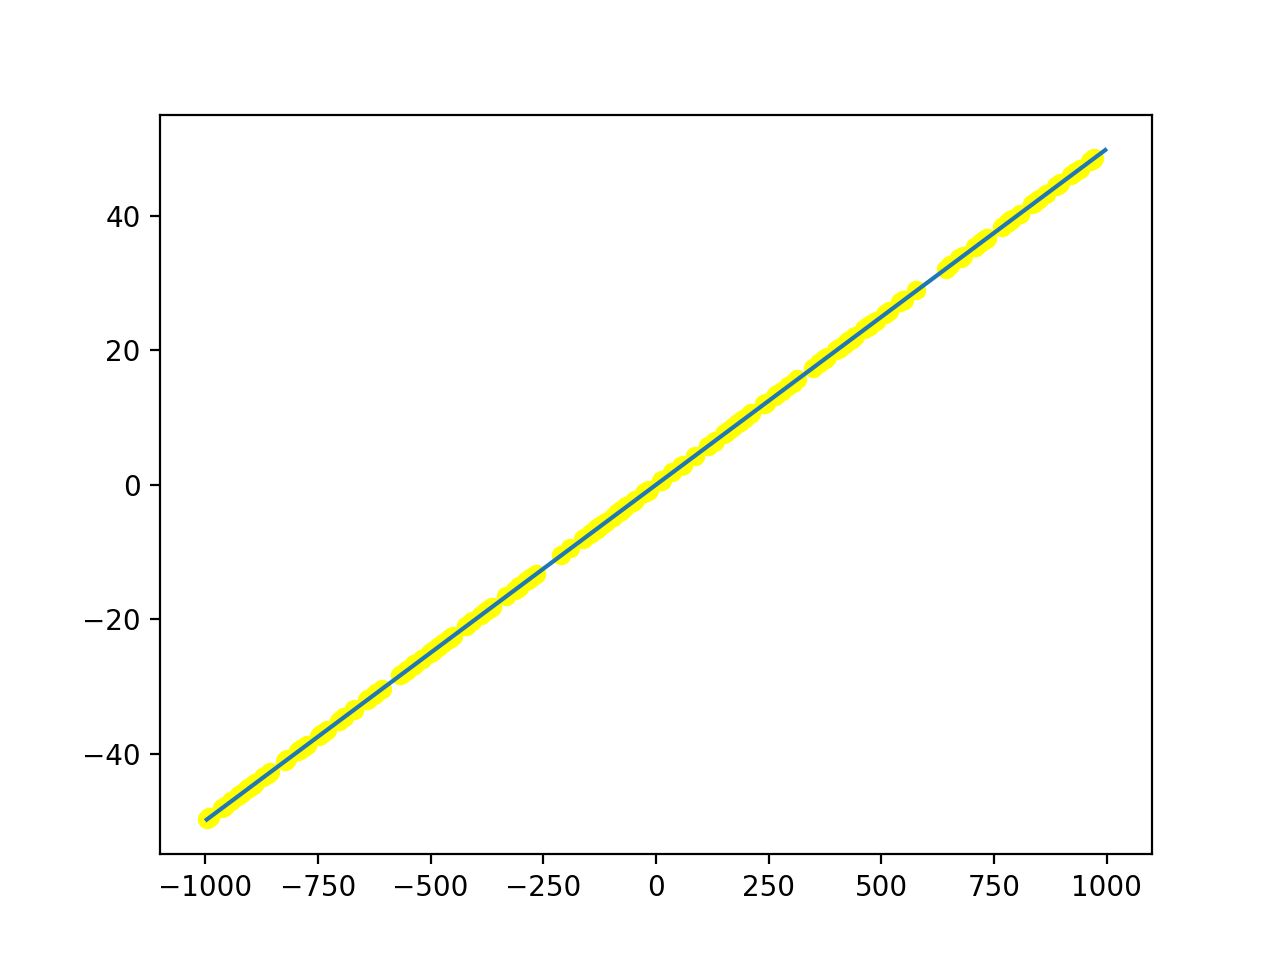

In [16]:
test(a, b, set4, det1, np.float64(1e-10), 1000, 200)

po lewej stronie: 0
po prawej stronie: 0
na prostej: 1000


<IPython.core.display.Javascript object>


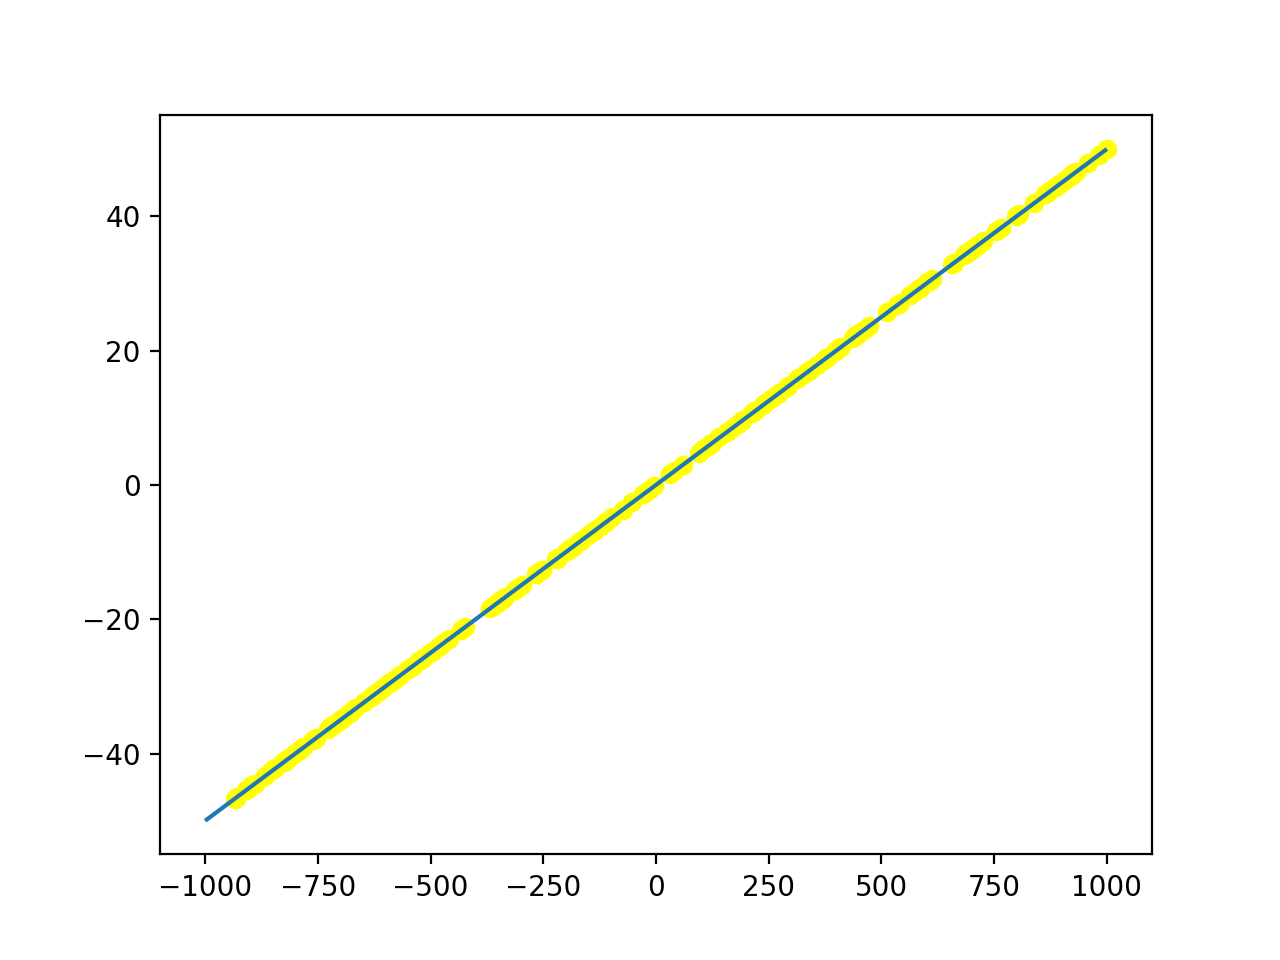

In [76]:
test(a, b, set4, det2, np.float64(1e-10), 1000, 200)

po lewej stronie: 0
po prawej stronie: 0
na prostej: 1000


<IPython.core.display.Javascript object>


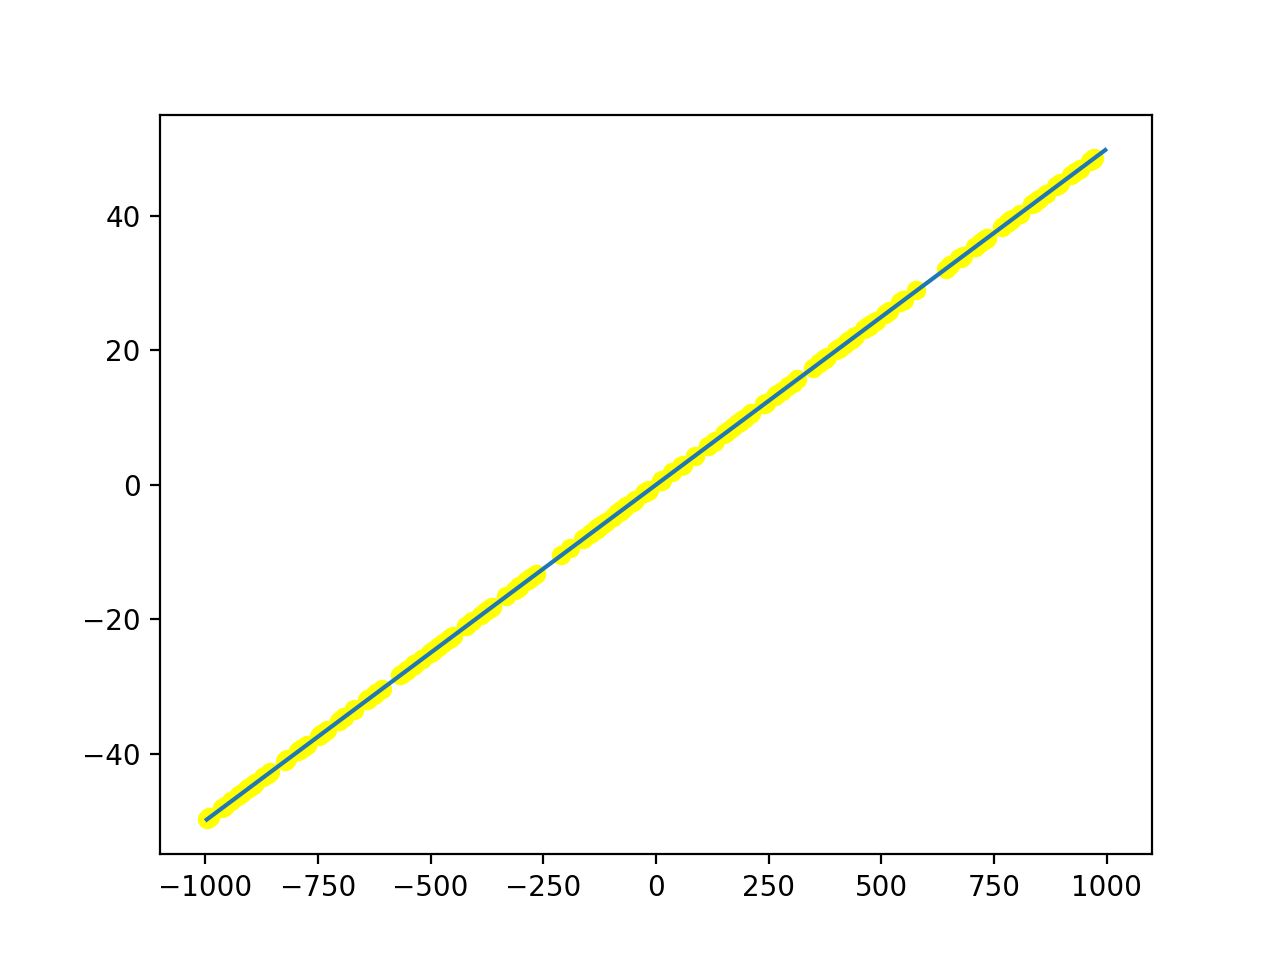

In [17]:
test(a, b, set4, det3, np.float64(1e-10), 1000, 200)

po lewej stronie: 0
po prawej stronie: 0
na prostej: 1000


<IPython.core.display.Javascript object>


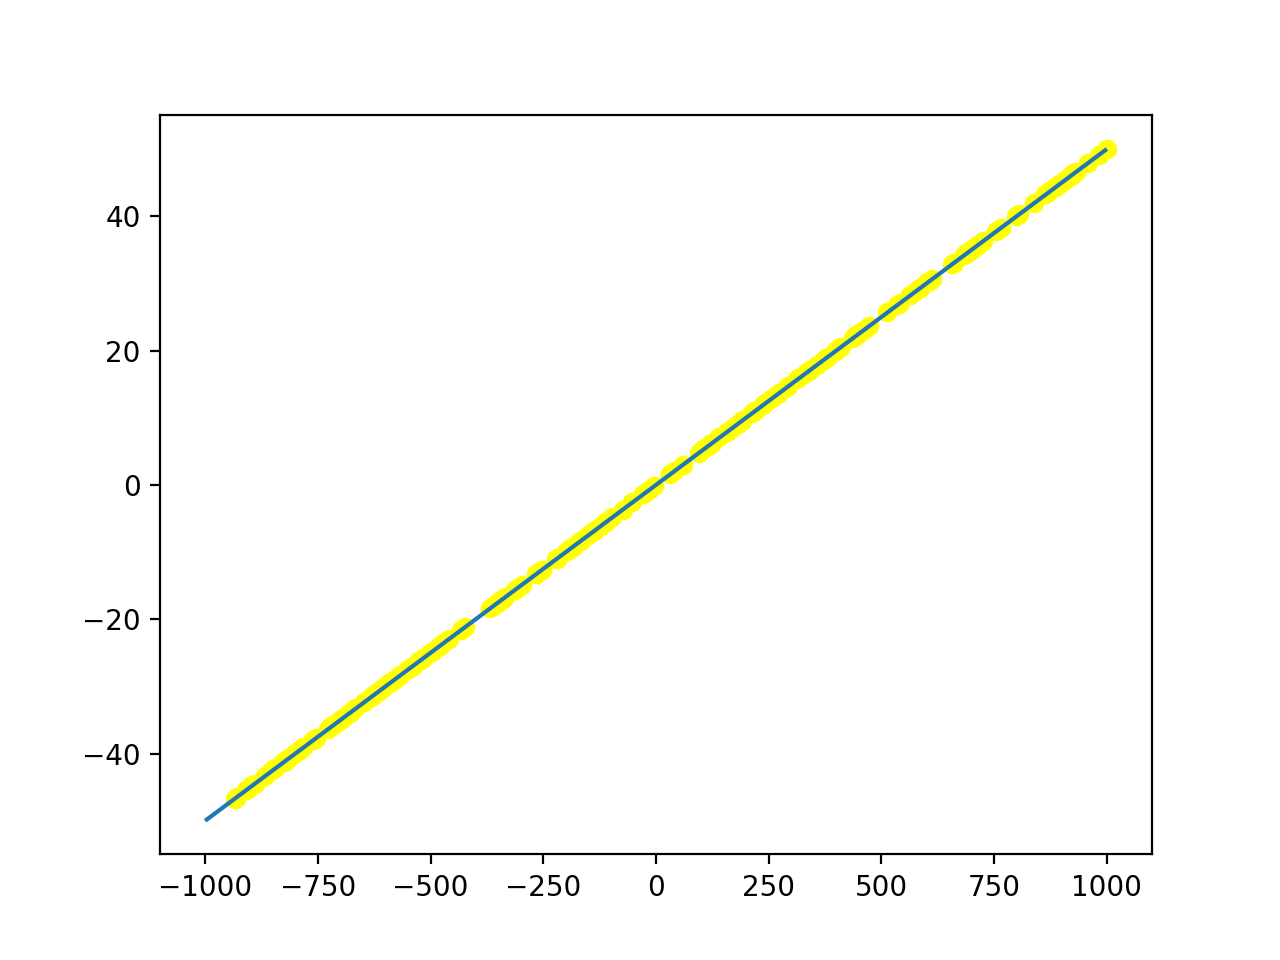

In [78]:
test(a, b, set4, det4, np.float64(1e-10), 1000, 200)

#### eps = $10^{-14}$

po lewej stronie: 0
po prawej stronie: 0
na prostej: 1000


<IPython.core.display.Javascript object>


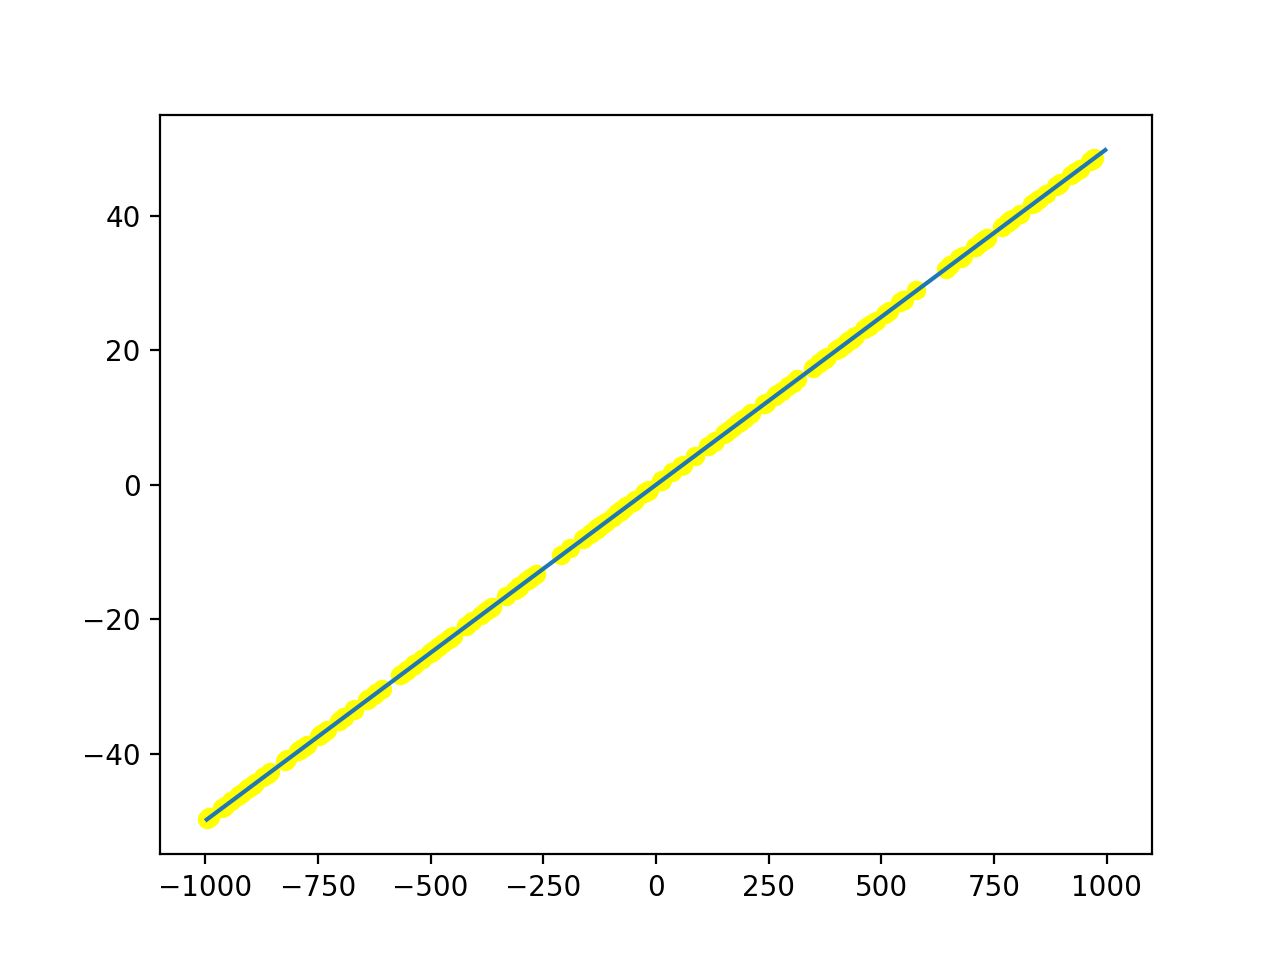

In [18]:
test(a, b, set4, det1, np.float64(1e-14), 1000, 200)

po lewej stronie: 142
po prawej stronie: 129
na prostej: 729


<IPython.core.display.Javascript object>


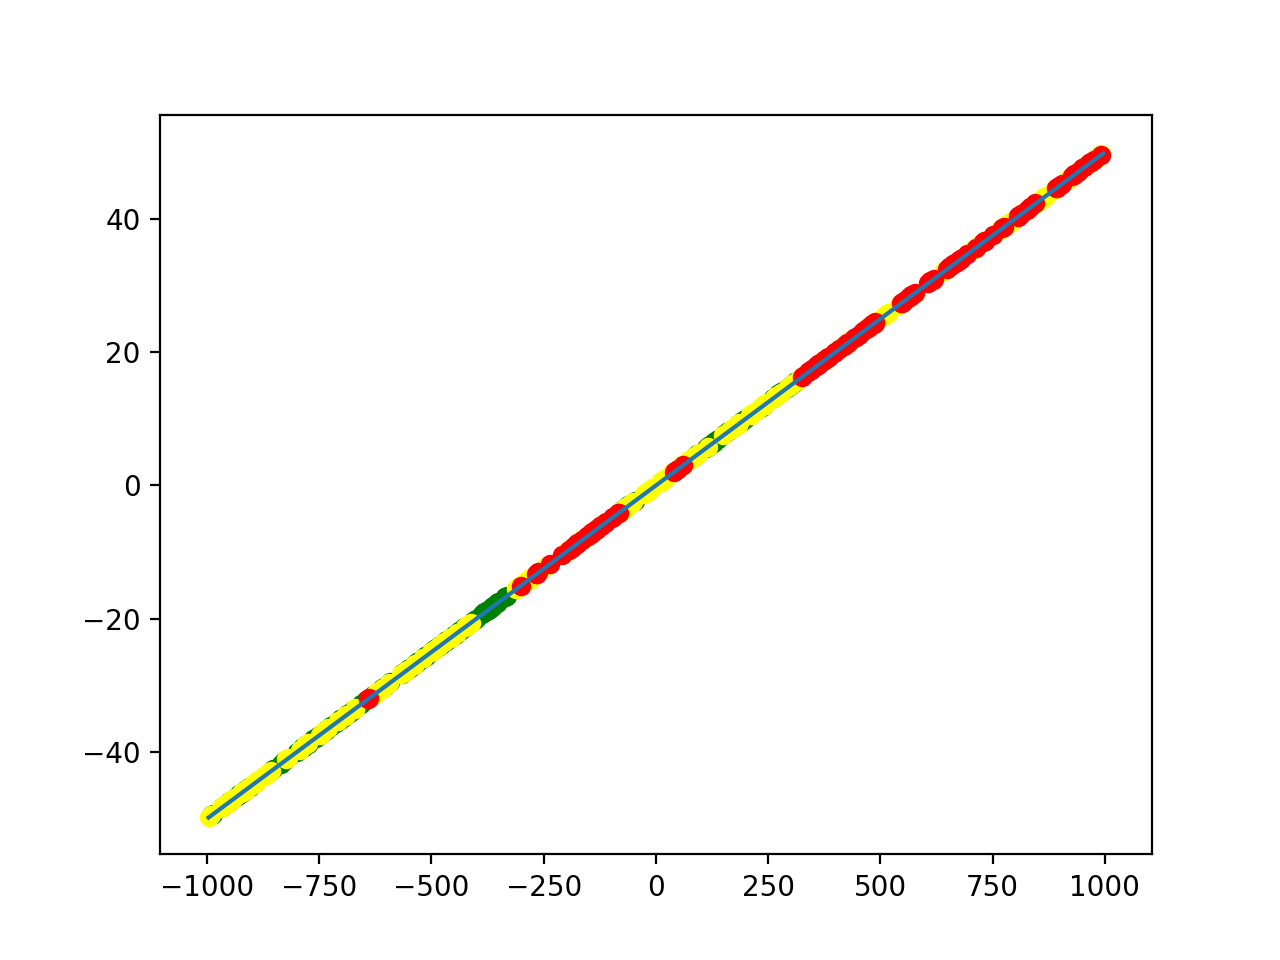

In [19]:
test(a, b, set4, det2, np.float64(1e-14), 1000, 200)

po lewej stronie: 18
po prawej stronie: 90
na prostej: 892


<IPython.core.display.Javascript object>


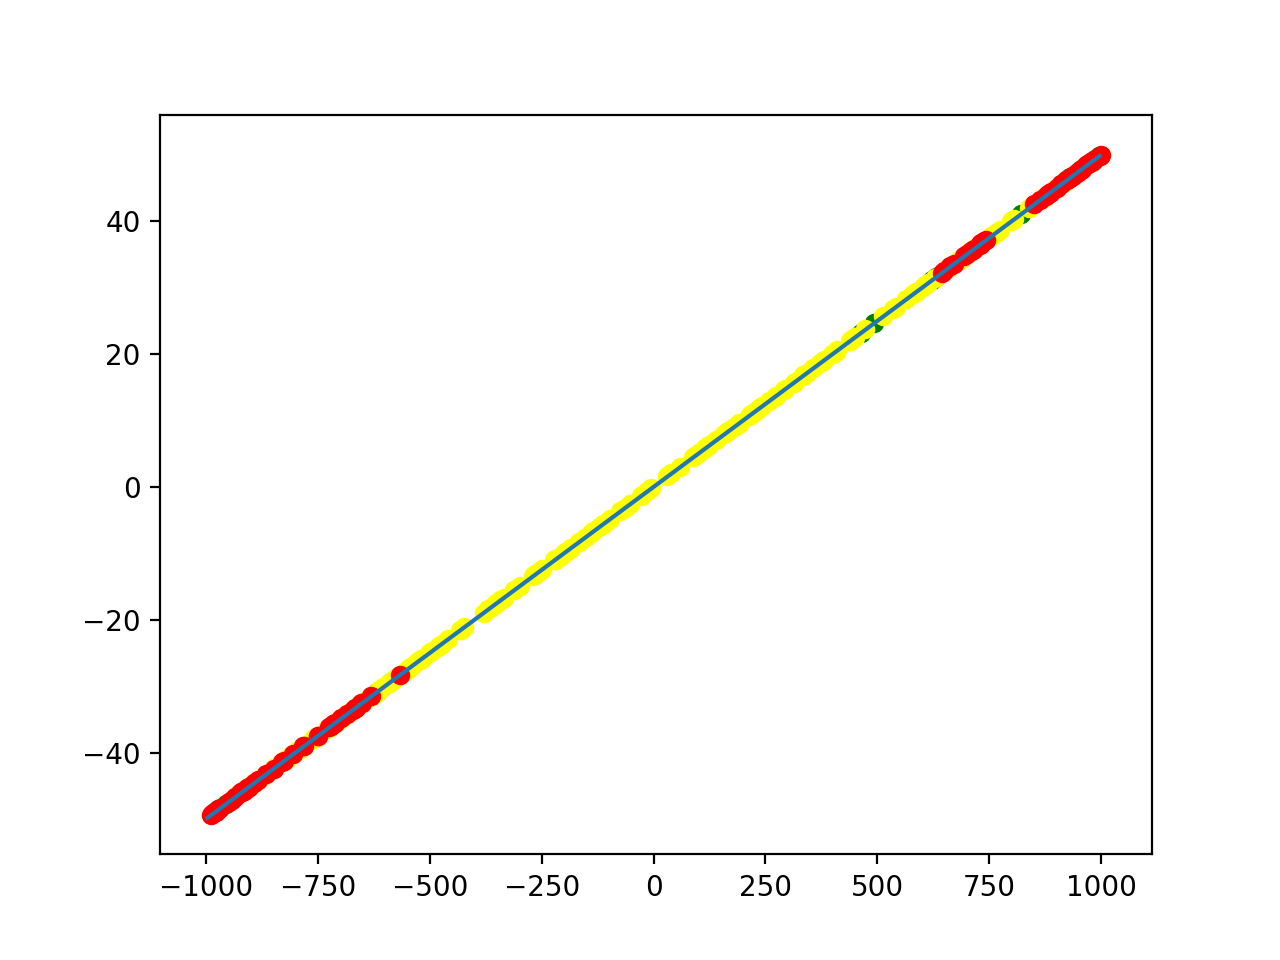

In [80]:
test(a, b, set4, det3, np.float64(1e-14), 1000, 200)

po lewej stronie: 158
po prawej stronie: 143
na prostej: 699


<IPython.core.display.Javascript object>


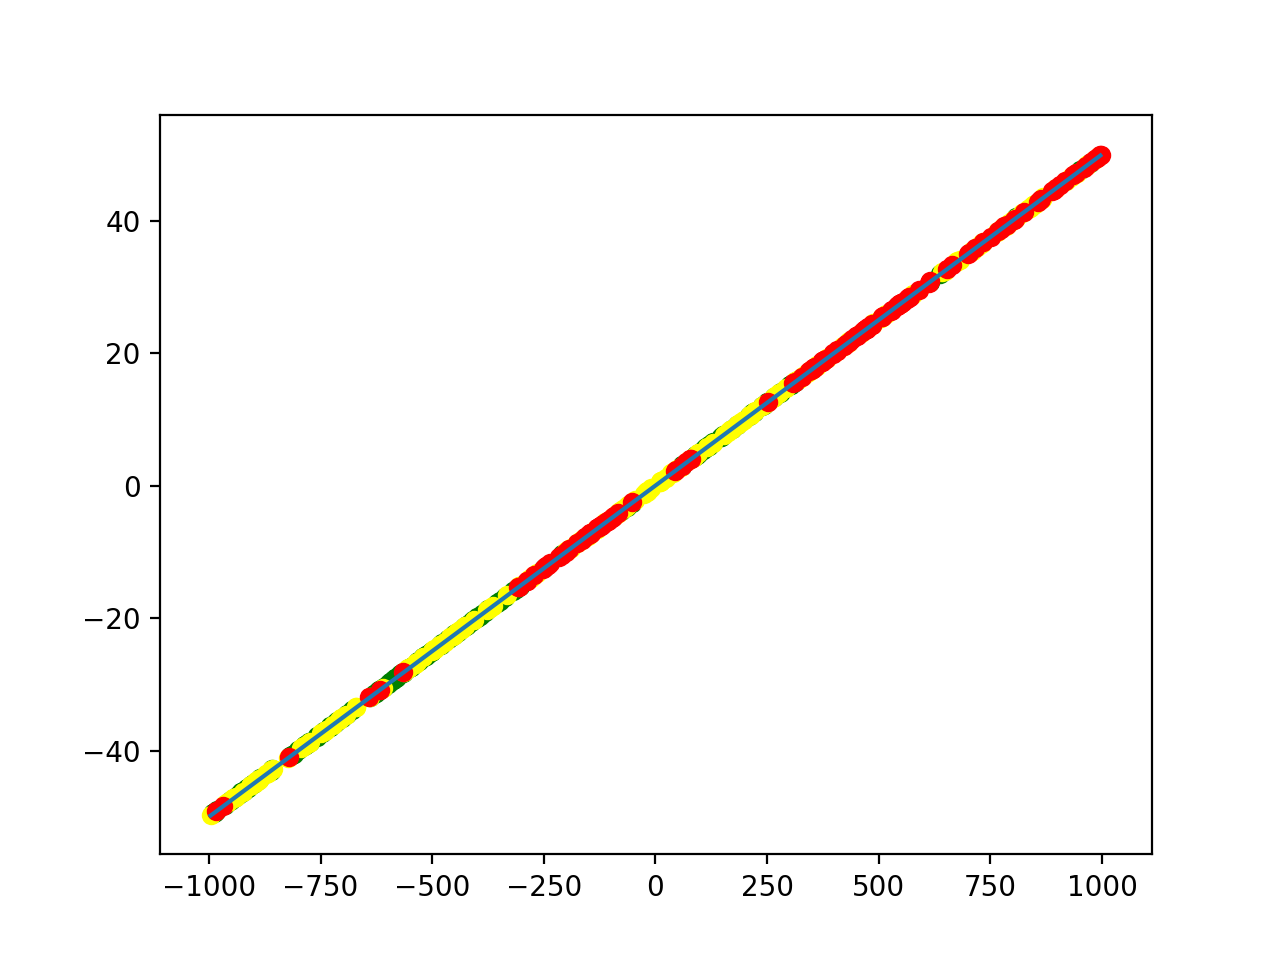

In [20]:
test(a, b, set4, det4, np.float64(1e-14), 1000, 200)

#### eps=0

po lewej stronie: 168
po prawej stronie: 413
na prostej: 419


<IPython.core.display.Javascript object>


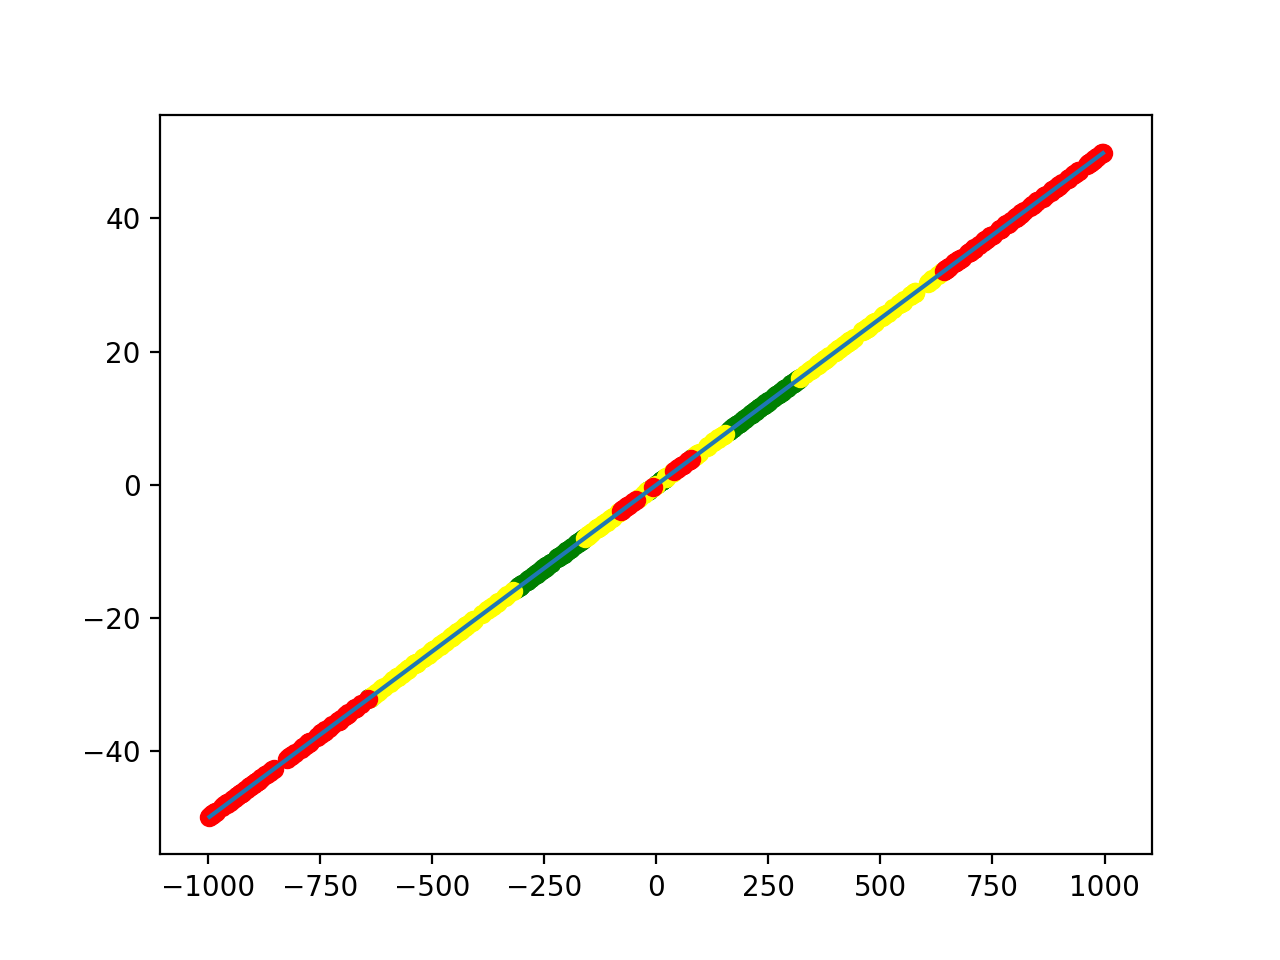

In [21]:
test(a, b, set4, det1, np.float64(0.0), 1000, 200)

po lewej stronie: 176
po prawej stronie: 416
na prostej: 408


<IPython.core.display.Javascript object>


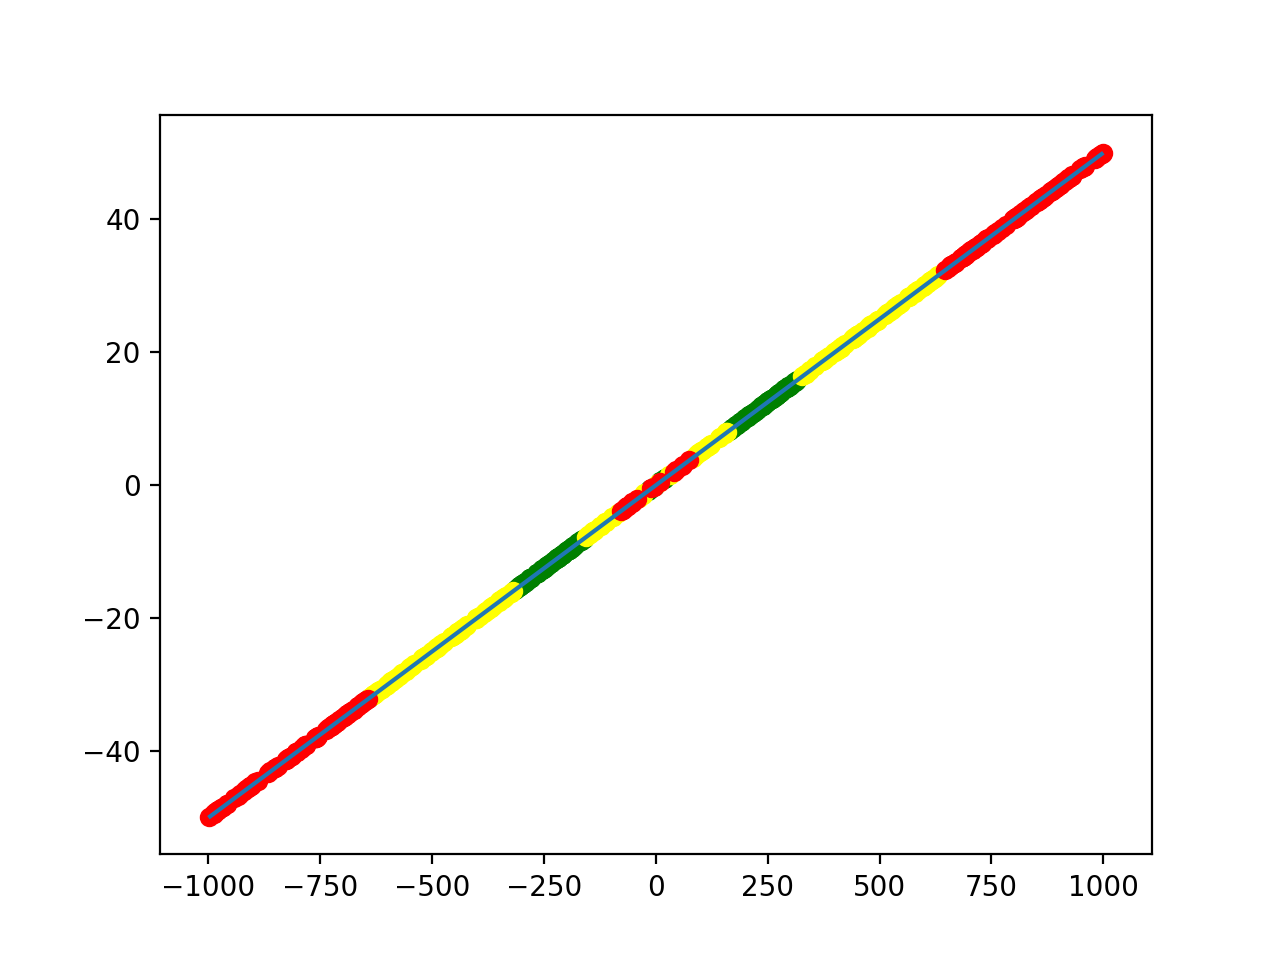

In [86]:
test(a, b, set4, det1, np.float64(0.0), 1000, 200)

po lewej stronie: 168
po prawej stronie: 413
na prostej: 419


<IPython.core.display.Javascript object>


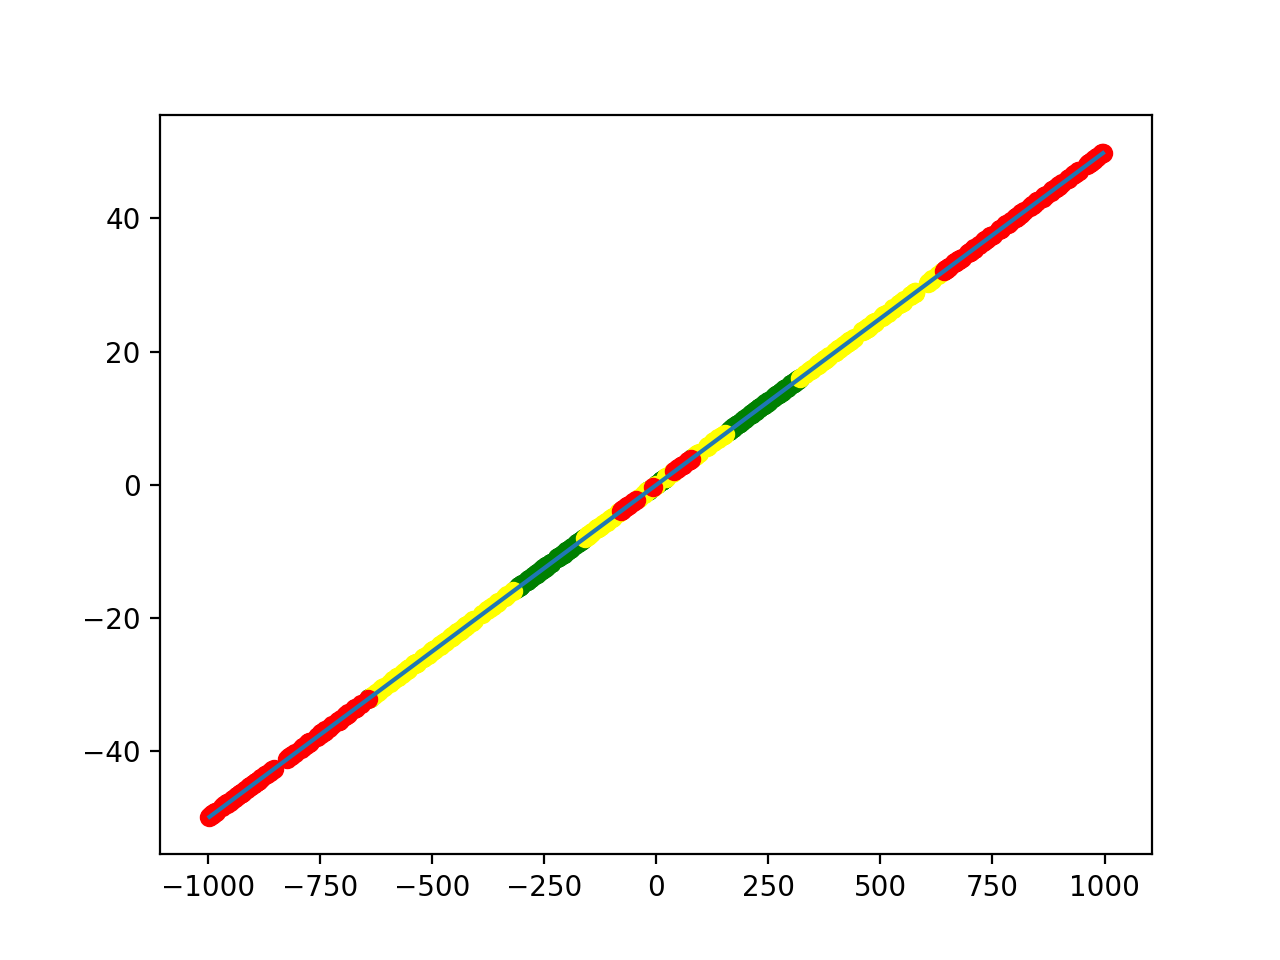

In [22]:
test(a, b, set4, det1, np.float64(0.0), 1000, 200)

po lewej stronie: 176
po prawej stronie: 416
na prostej: 408


<IPython.core.display.Javascript object>


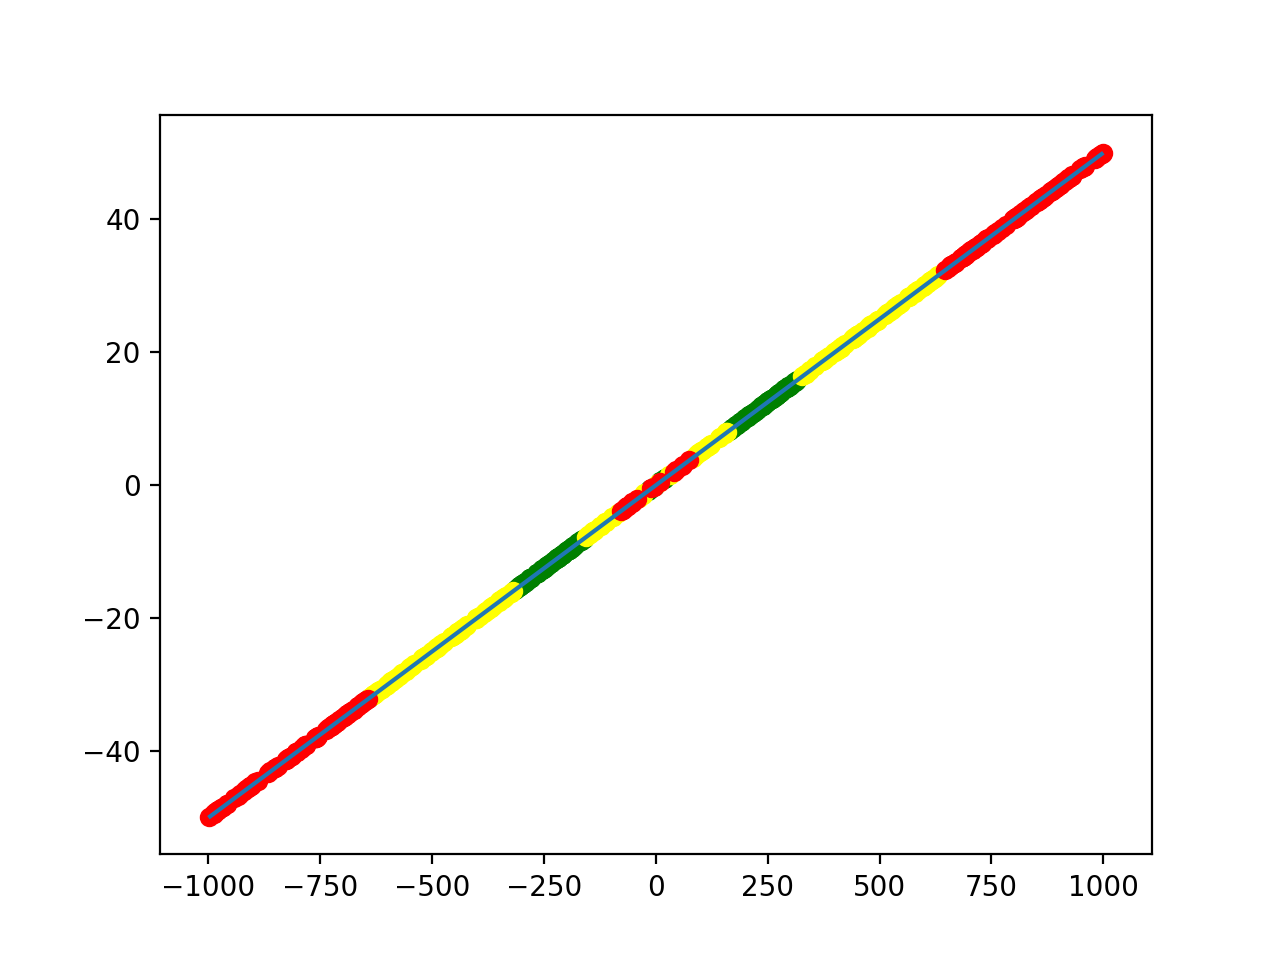

In [88]:
test(a, b, set4, det1, np.float64(0.0), 1000, 200)

## Różnicę w podziale punktów 

In [23]:
def diff(a, b, point_set, eps, det1, det2, lim_x, num_points):
    r_e = []
    r_l = []
    l_r = []
    l_e = []
    e_r = []
    e_l = []
    
    for p in point_set.points:
        dd = (det1(a,b,p), det2(a,b,p))
        
        if(dd[0] > eps):
            if(dd[1] < -eps):
                l_r.append(p)
            elif(dd[1] < eps and dd[1] > -eps):
                l_e.append(p)
        elif(dd[0] < -eps):
            if(dd[1] > eps):
                r_l.append(p)
            elif(dd[1] < eps and dd[1] > -eps):
                r_e.append(p)
        else:
            if(dd[1] < -eps):
                e_r.append(p)
            elif(dd[1] > eps):
                e_l.append(p)
    print('po prawej według %s na prostej według %s: %d color=lime' % (det1.__name__, det2.__name__, len(r_e)))
    print('po prawej według %s po lewej według %s: %d color=orange' % (det1.__name__, det2.__name__,len(r_l)))
    print('po lewej według %s po prawej według %s: %d color=deeppink' % (det1.__name__, det2.__name__,len(l_r)))
    print('po lewej według %s na prostej według %s: %d color=navy' % (det1.__name__, det2.__name__,len(l_e)))
    print('na prostej według %s po prawej według %s: %d color=purple' % (det1.__name__, det2.__name__,len(e_r)))
    print('na prostej według %s po lewej według %s: %d color=deepskyblue' % (det1.__name__, det2.__name__,len(e_l)))
    
    p_r_e = PointsCollection(r_e[:num_points], color='lime')
    p_r_l = PointsCollection(r_l[:num_points], color='orange')
    p_l_r = PointsCollection(l_r[:num_points], color='deeppink')
    p_l_e = PointsCollection(l_e[:num_points], color='navy')
    p_e_r = PointsCollection(e_r[:num_points], color='purple')
    p_e_l = PointsCollection(e_l[:num_points], color='deepskyblue')
    
    plot = Plot([p_r_e,
                 p_r_l,
                 p_l_r,
                 p_l_e,
                 p_e_r,
                 p_e_l], 
               [LinesCollection([[(-lim_x, -0.05*lim_x), (lim_x, 0.05*lim_x)]])])
    plot.draw()

### Dla eps=$10^{-14}$

#### wyznacznik 3x3 i wyznacznik 2x2

po prawej według det1 na prostej według det2: 0 color=lime
po prawej według det1 po lewej według det2: 0 color=orange
po lewej według det1 po prawej według det2: 0 color=deeppink
po lewej według det1 na prostej według det2: 0 color=navy
na prostej według det1 po prawej według det2: 129 color=purple
na prostej według det1 po lewej według det2: 142 color=deepskyblue


<IPython.core.display.Javascript object>


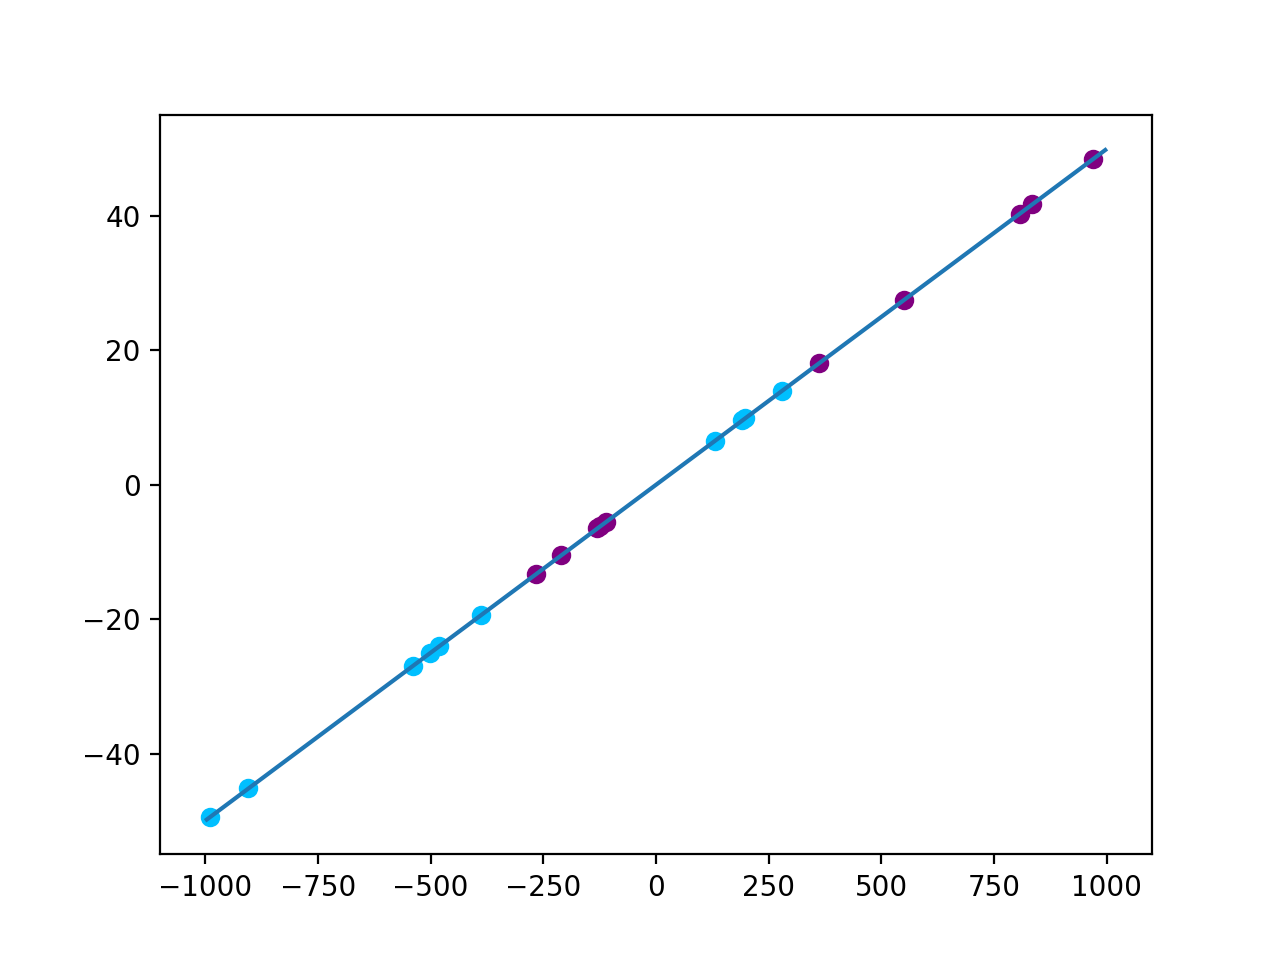

In [24]:
diff(a,b,set4, np.float64(1e-14), det1, det2, 1000, 10)

#### wyznacznik 3x3 i 3x3 z numpy

po prawej według det1 na prostej według det3: 0 color=lime
po prawej według det1 po lewej według det3: 0 color=orange
po lewej według det1 po prawej według det3: 0 color=deeppink
po lewej według det1 na prostej według det3: 0 color=navy
na prostej według det1 po prawej według det3: 98 color=purple
na prostej według det1 po lewej według det3: 18 color=deepskyblue


<IPython.core.display.Javascript object>


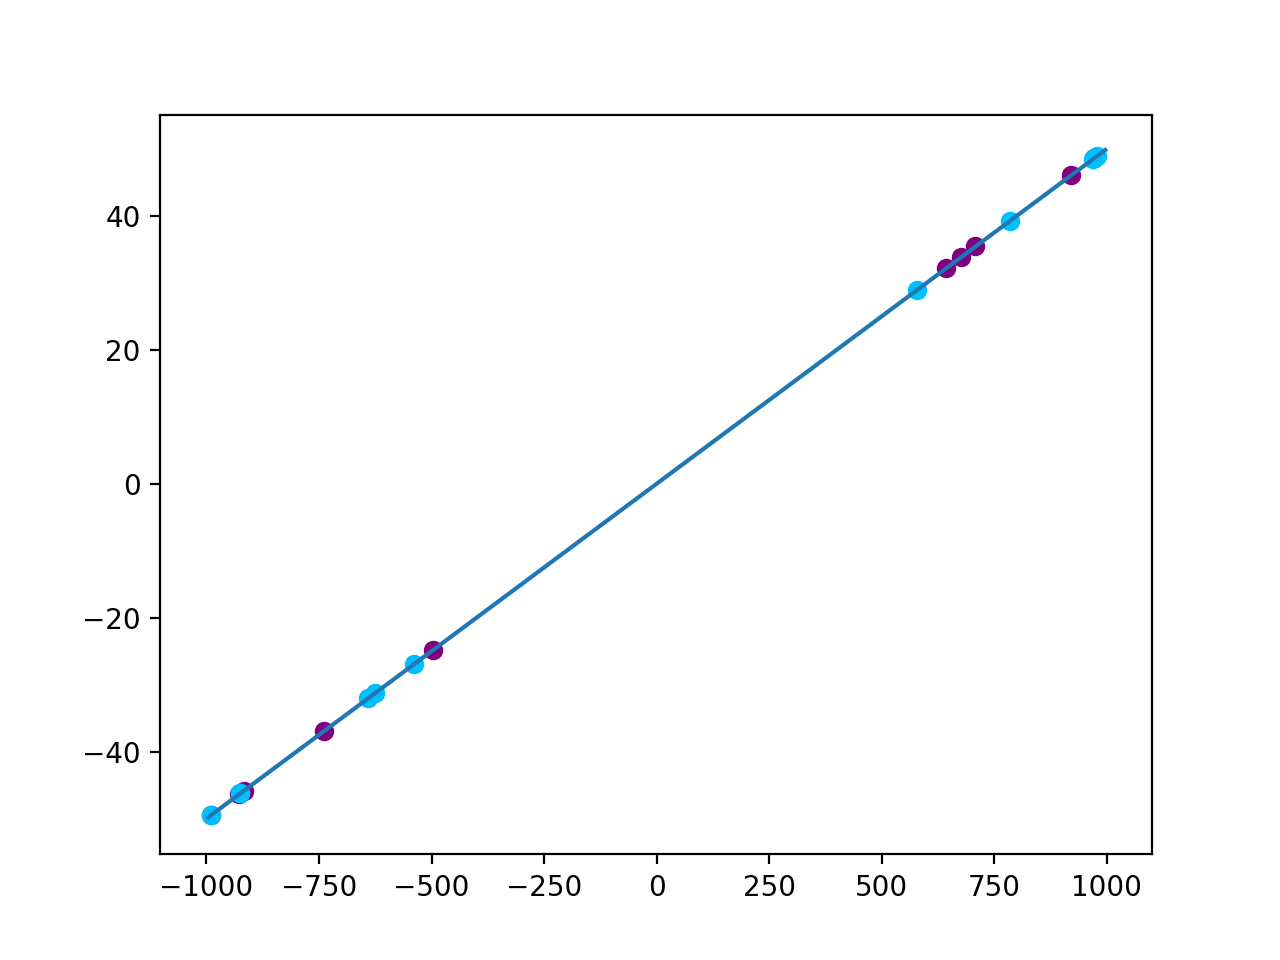

In [25]:
diff(a,b,set4, np.float64(1e-14), det1, det3, 1000, 10)

#### wyznacznik 2x2 i 2x2 z numpy

po prawej według det2 na prostej według det4: 85 color=lime
po prawej według det2 po lewej według det4: 1 color=orange
po lewej według det2 po prawej według det4: 3 color=deeppink
po lewej według det2 na prostej według det4: 93 color=navy
na prostej według det2 po prawej według det4: 97 color=purple
na prostej według det2 po lewej według det4: 111 color=deepskyblue


<IPython.core.display.Javascript object>


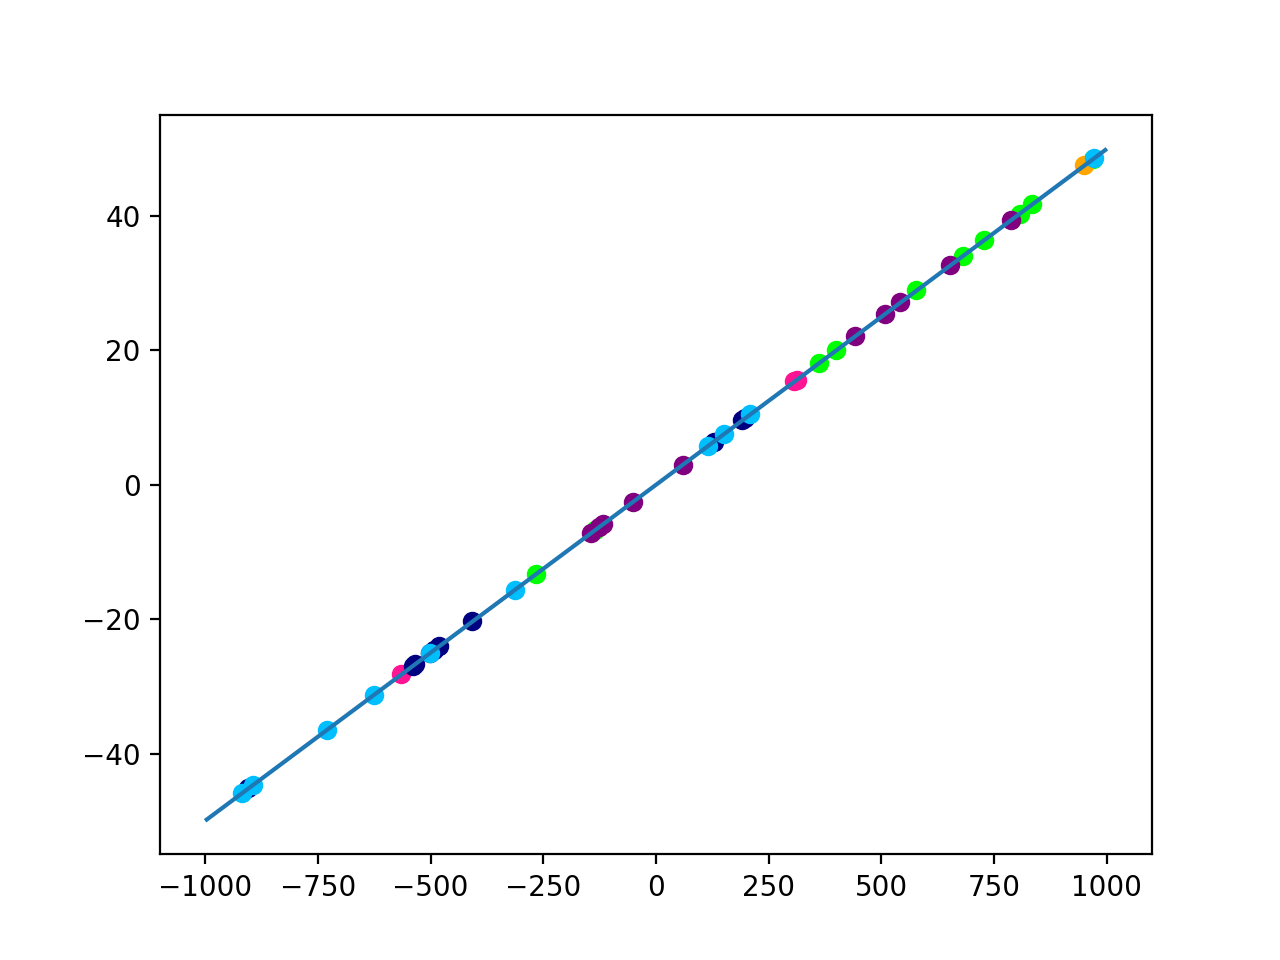

In [26]:
diff(a,b,set4, np.float64(1e-14), det2, det4, 1000, 10)

#### wyznacznik 3x3 z numpy i 2x2 z numpy

po prawej według det3 na prostej według det4: 66 color=lime
po prawej według det3 po lewej według det4: 17 color=orange
po lewej według det3 po prawej według det4: 1 color=deeppink
po lewej według det3 na prostej według det4: 13 color=navy
na prostej według det3 po prawej według det4: 127 color=purple
na prostej według det3 po lewej według det4: 137 color=deepskyblue


<IPython.core.display.Javascript object>


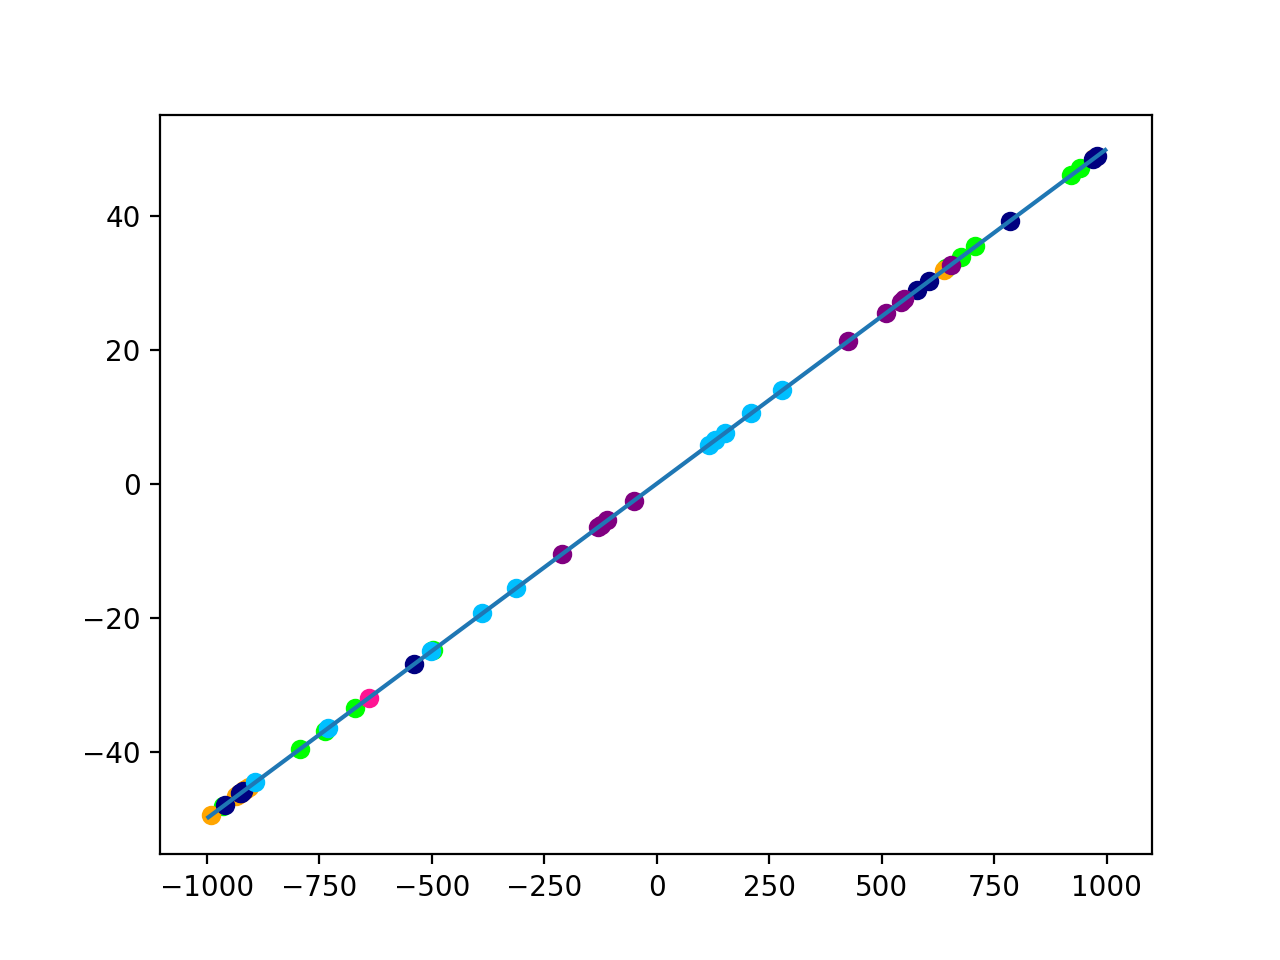

In [27]:
diff(a,b,set4, np.float64(1e-14), det3, det4, 1000, 10)

### Dla eps=$10^{-6}$

#### wyznacznik 3x3 i wyznacznik 2x2

po prawej według det1 na prostej według det2: 0 color=lime
po prawej według det1 po lewej według det2: 0 color=orange
po lewej według det1 po prawej według det2: 0 color=deeppink
po lewej według det1 na prostej według det2: 0 color=navy
na prostej według det1 po prawej według det2: 0 color=purple
na prostej według det1 po lewej według det2: 0 color=deepskyblue


<IPython.core.display.Javascript object>


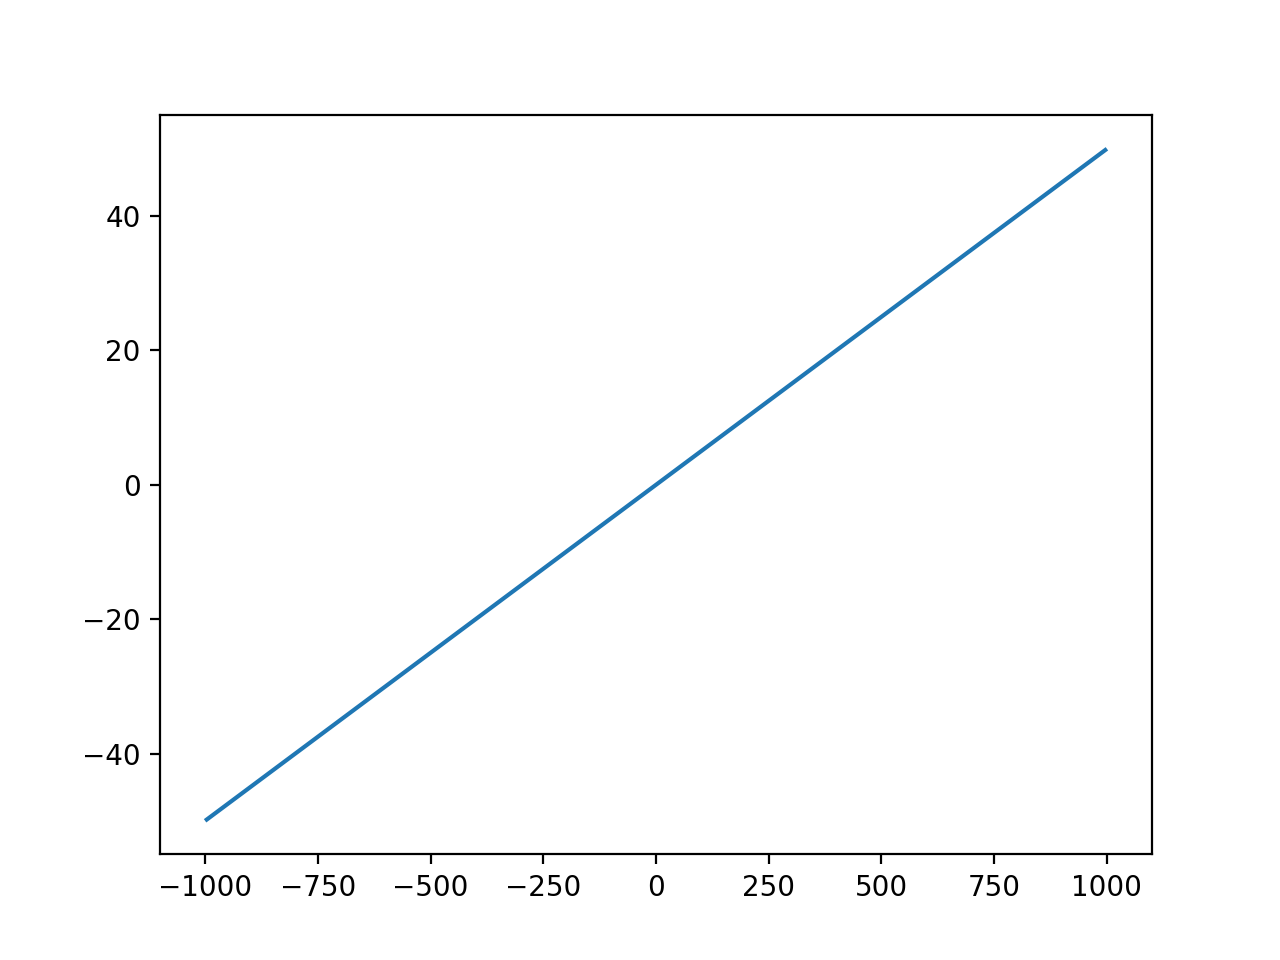

In [139]:
diff(a,b,set4, np.float64(1e-6), det1, det2, 1000, 10)

#### wyznacznik 3x3 i 3x3 z numpy

po prawej według det1 na prostej według det3: 0 color=lime
po prawej według det1 po lewej według det3: 0 color=orange
po lewej według det1 po prawej według det3: 0 color=deeppink
po lewej według det1 na prostej według det3: 0 color=navy
na prostej według det1 po prawej według det3: 0 color=purple
na prostej według det1 po lewej według det3: 0 color=deepskyblue


<IPython.core.display.Javascript object>


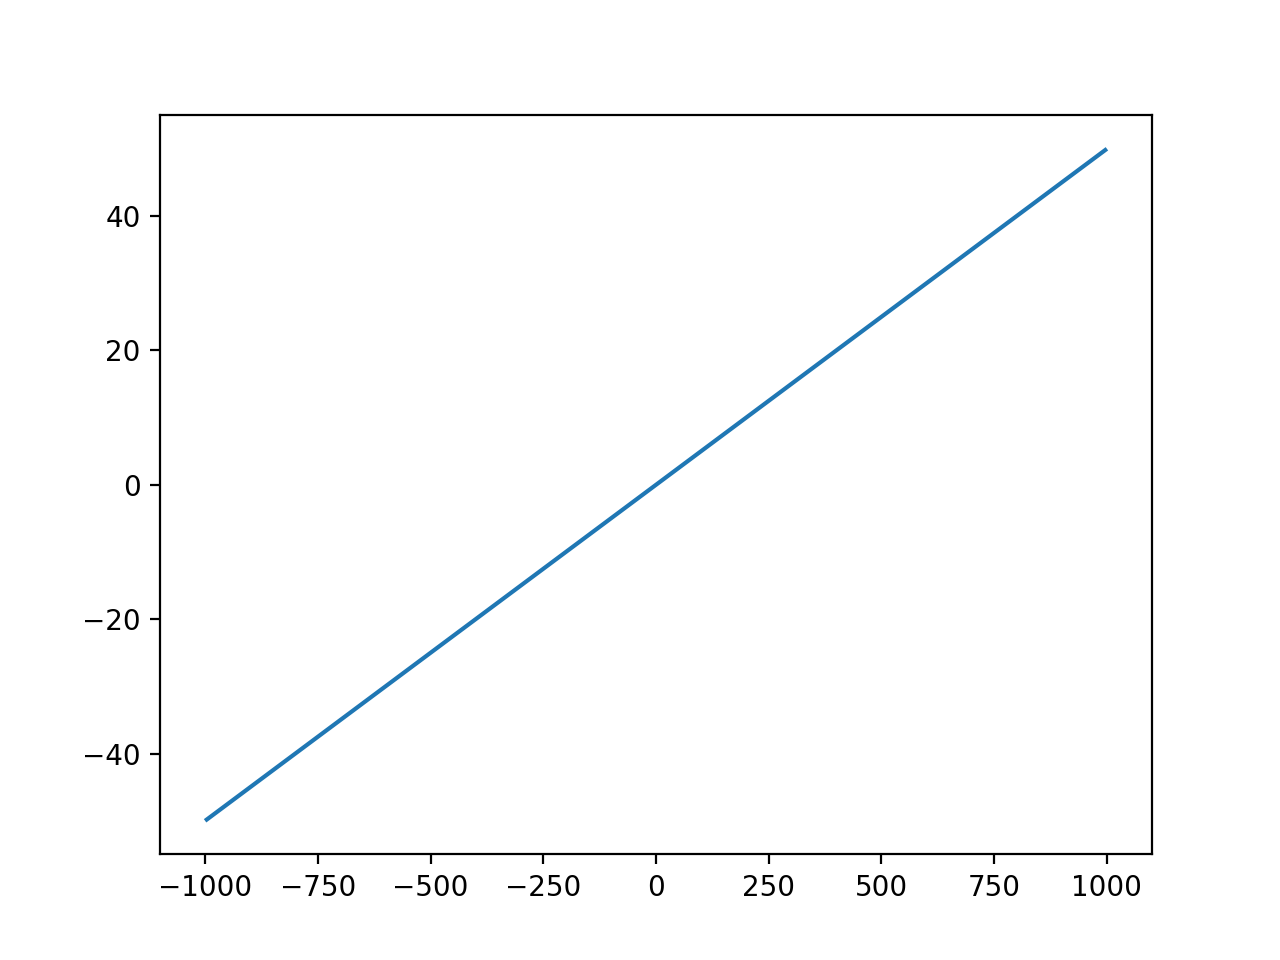

In [140]:
diff(a,b,set4, np.float64(1e-6), det1, det3, 1000, 10)

#### wyznacznik 2x2 i 2x2 z numpy

po prawej według det2 na prostej według det4: 0 color=lime
po prawej według det2 po lewej według det4: 0 color=orange
po lewej według det2 po prawej według det4: 0 color=deeppink
po lewej według det2 na prostej według det4: 0 color=navy
na prostej według det2 po prawej według det4: 0 color=purple
na prostej według det2 po lewej według det4: 0 color=deepskyblue


<IPython.core.display.Javascript object>


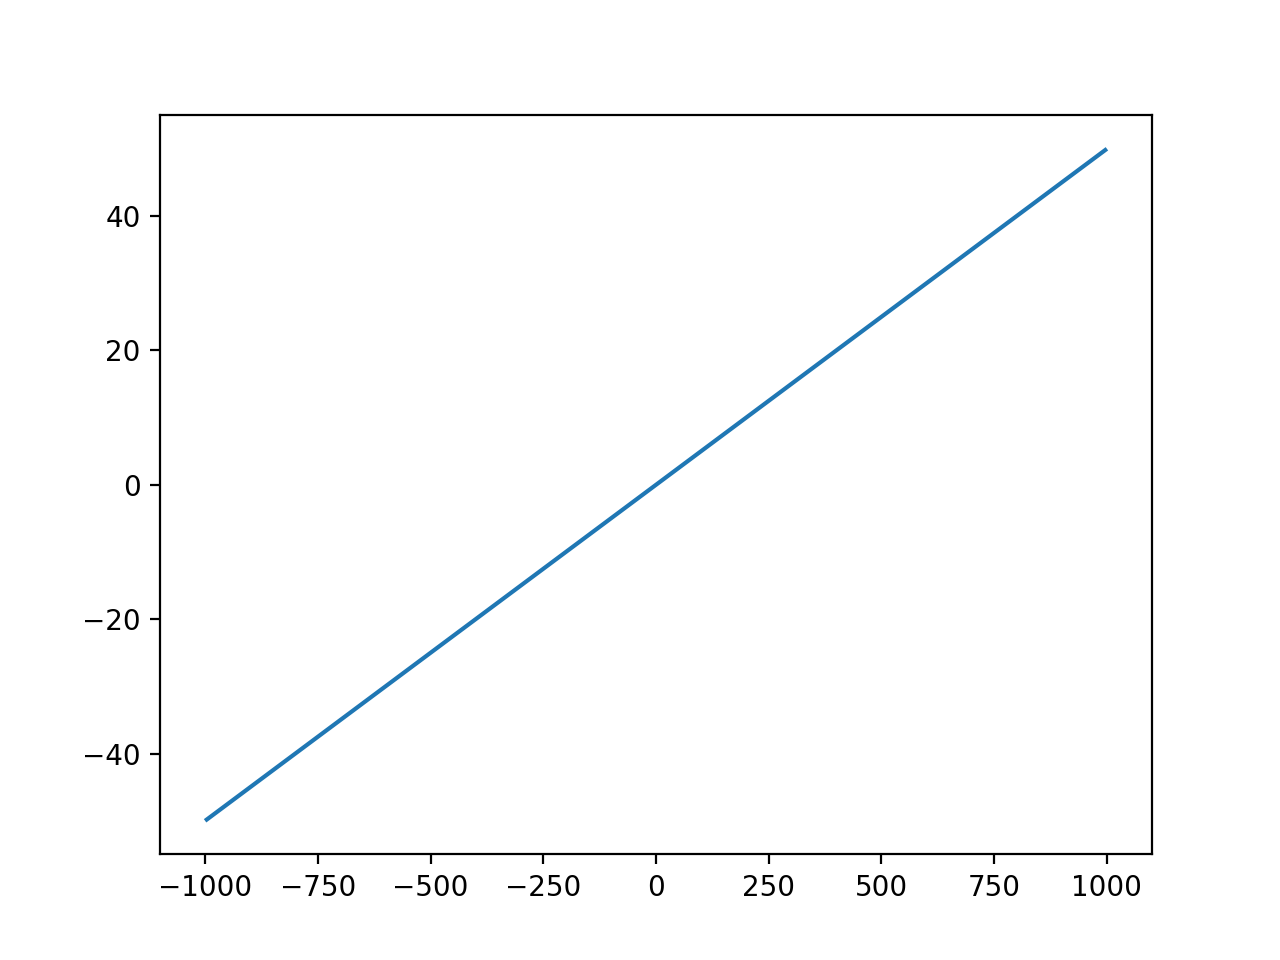

In [141]:
diff(a,b,set4, np.float64(1e-6), det2, det4, 1000, 10)

#### wyznacznik 3x3 z numpy i 2x2 z numpy

po prawej według det3 na prostej według det4: 0 color=lime
po prawej według det3 po lewej według det4: 0 color=orange
po lewej według det3 po prawej według det4: 0 color=deeppink
po lewej według det3 na prostej według det4: 0 color=navy
na prostej według det3 po prawej według det4: 0 color=purple
na prostej według det3 po lewej według det4: 0 color=deepskyblue


<IPython.core.display.Javascript object>


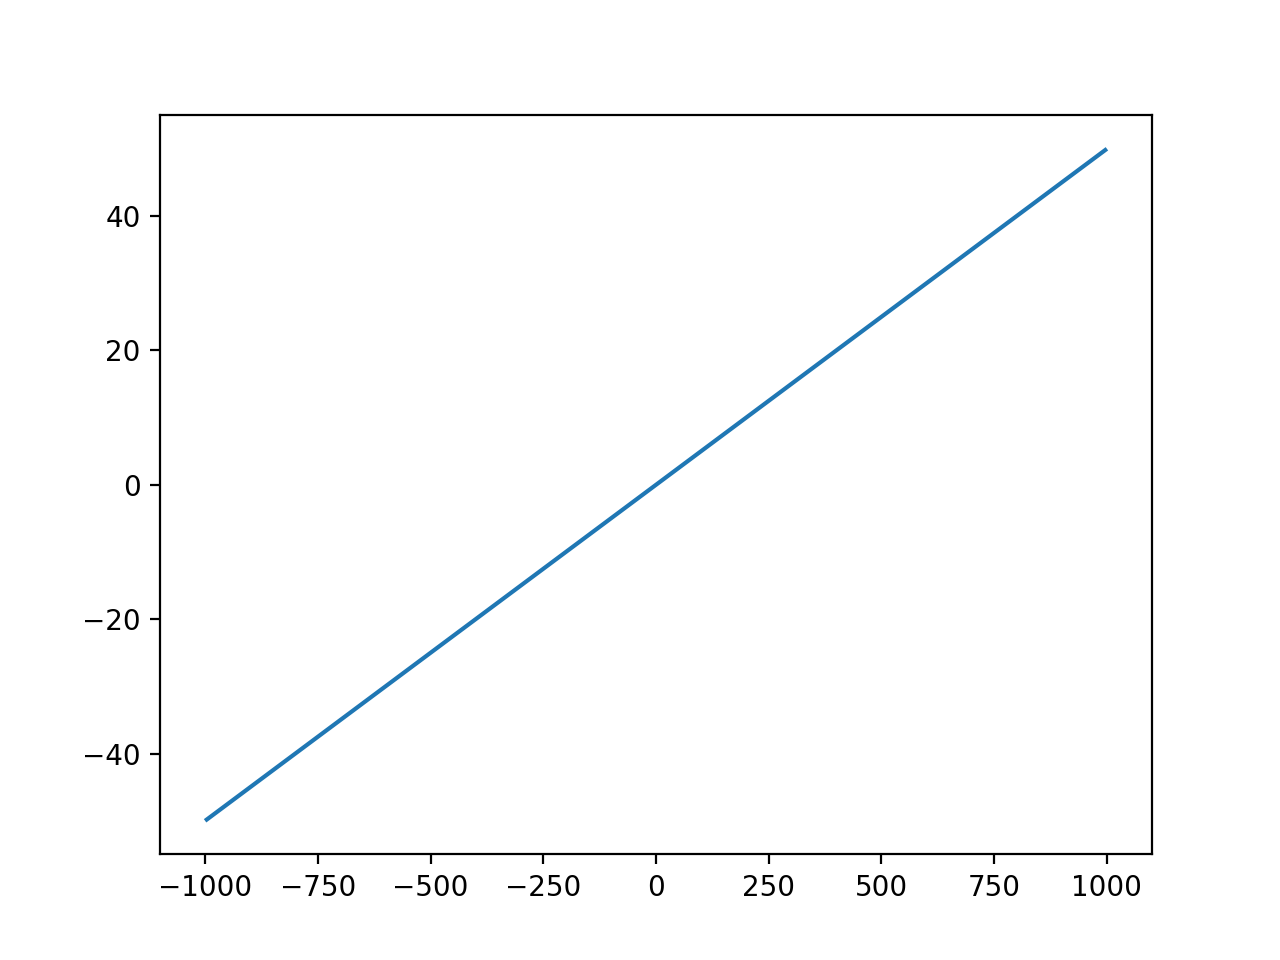

In [142]:
diff(a,b,set4, np.float64(1e-6), det3, det4, 1000, 10)

### Dla eps=0

#### wyznacznik 3x3 i wyznacznik 2x2

po prawej według det1 na prostej według det2: 0 color=lime
po prawej według det1 po lewej według det2: 48 color=orange
po lewej według det1 po prawej według det2: 25 color=deeppink
po lewej według det1 na prostej według det2: 0 color=navy
na prostej według det1 po prawej według det2: 71 color=purple
na prostej według det1 po lewej według det2: 90 color=deepskyblue


<IPython.core.display.Javascript object>


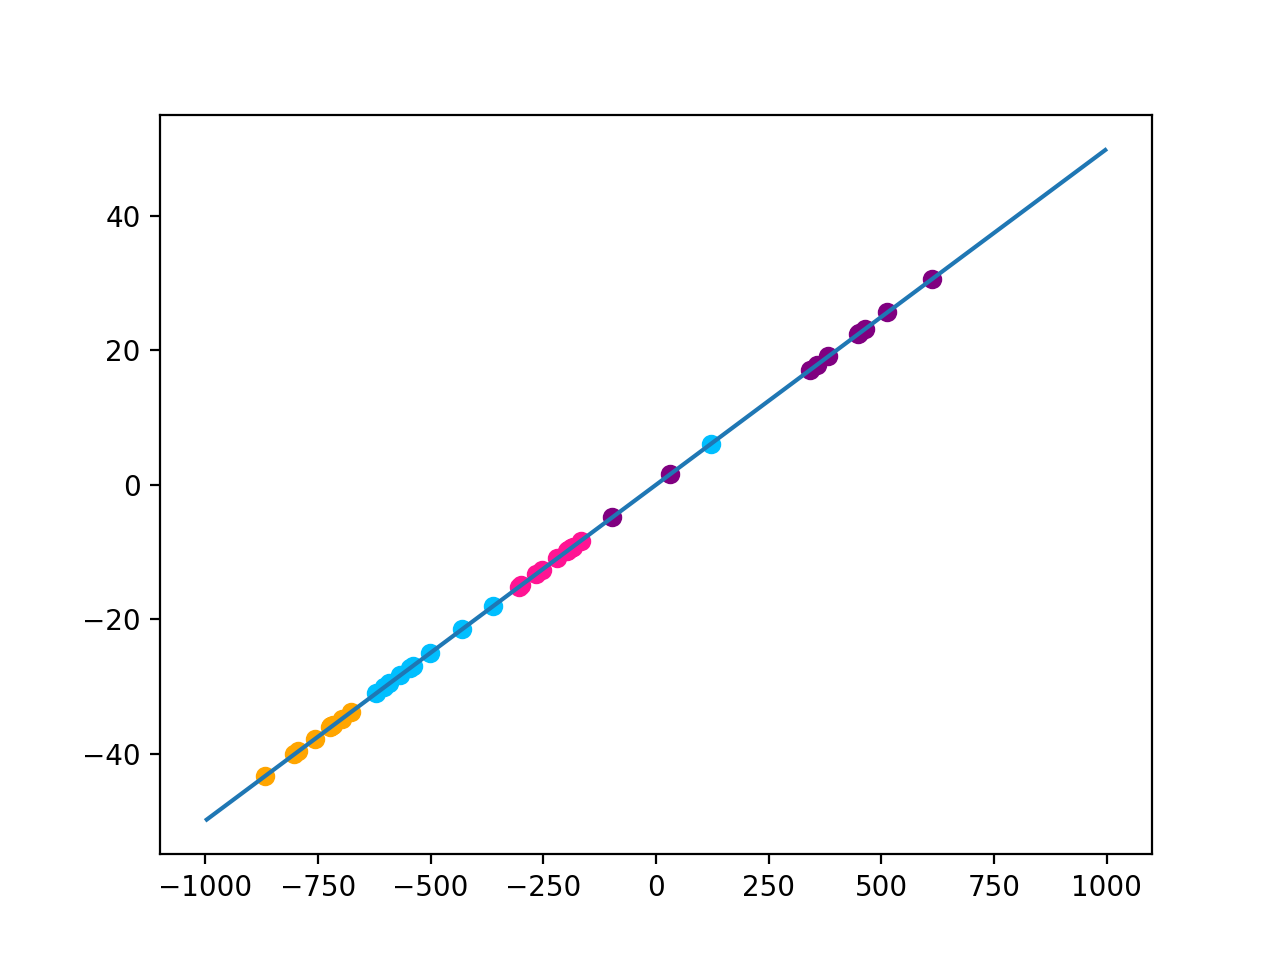

In [143]:
diff(a,b,set4, np.float64(0.0), det1, det2, 1000, 10)

#### wyznacznik 3x3 i 3x3 z numpy

po prawej według det1 na prostej według det3: 0 color=lime
po prawej według det1 po lewej według det3: 75 color=orange
po lewej według det1 po prawej według det3: 21 color=deeppink
po lewej według det1 na prostej według det3: 0 color=navy
na prostej według det1 po prawej według det3: 84 color=purple
na prostej według det1 po lewej według det3: 195 color=deepskyblue


<IPython.core.display.Javascript object>


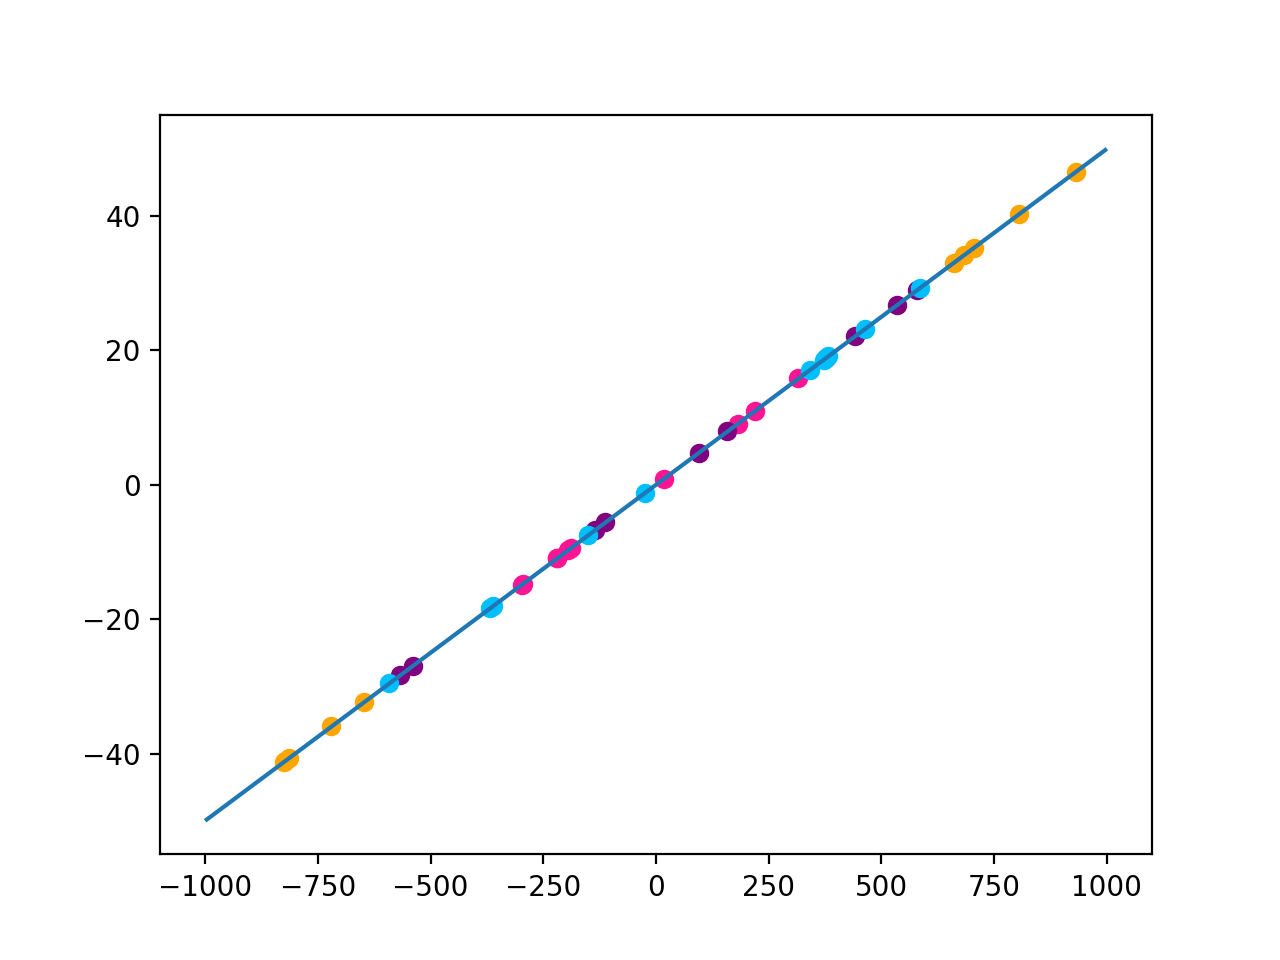

In [144]:
diff(a,b,set4, np.float64(0.0), det1, det3, 1000, 10)

#### wyznacznik 2x2 i 2x2 z numpy

po prawej według det2 na prostej według det4: 0 color=lime
po prawej według det2 po lewej według det4: 0 color=orange
po lewej według det2 po prawej według det4: 1 color=deeppink
po lewej według det2 na prostej według det4: 0 color=navy
na prostej według det2 po prawej według det4: 106 color=purple
na prostej według det2 po lewej według det4: 107 color=deepskyblue


<IPython.core.display.Javascript object>


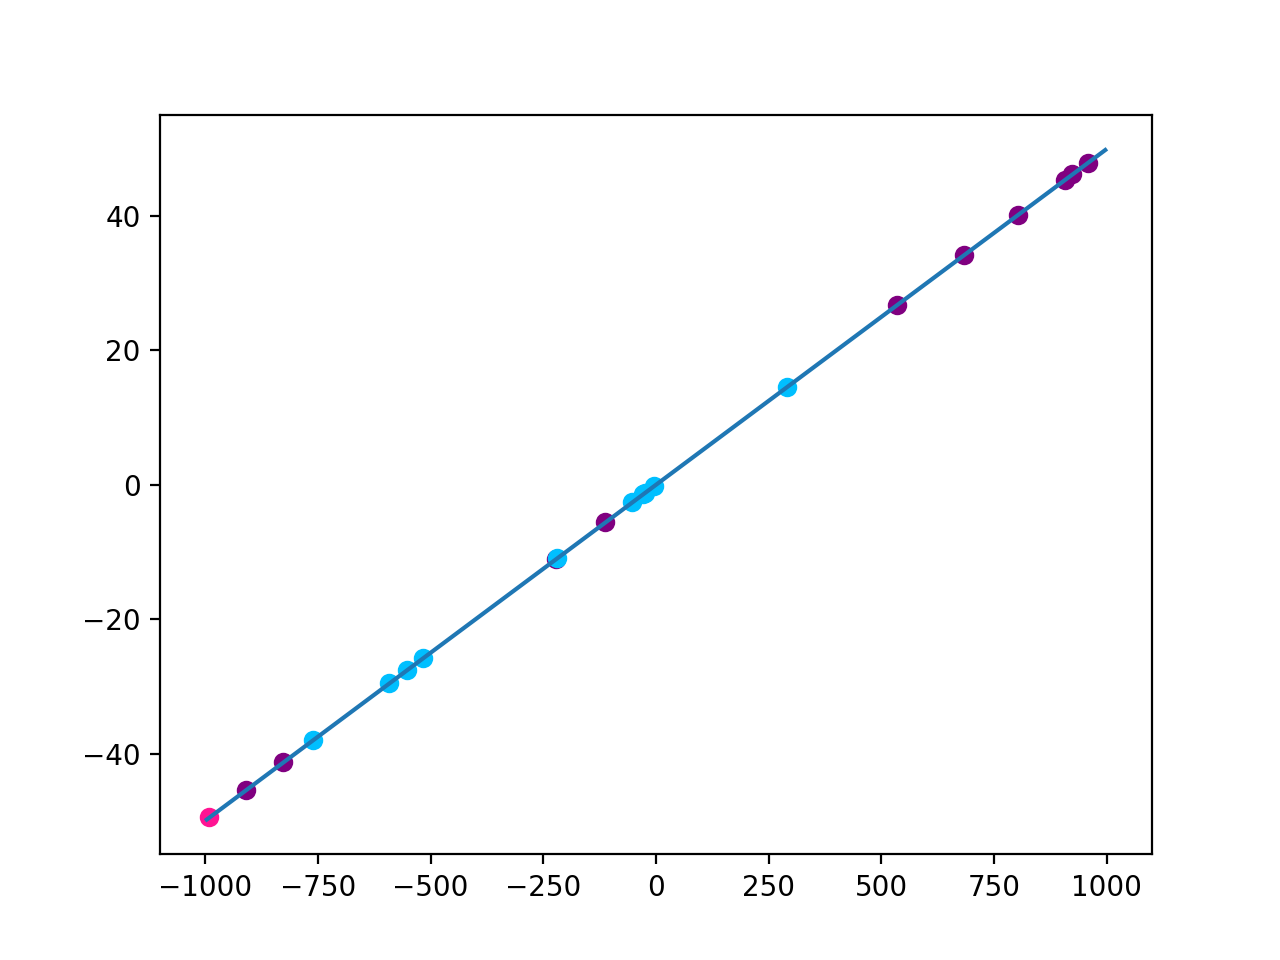

In [145]:
diff(a,b,set4, np.float64(0.0), det2, det4, 1000, 10)

#### wyznacznik 3x3 z numpy i 2x2 z numpy

po prawej według det3 na prostej według det4: 0 color=lime
po prawej według det3 po lewej według det4: 36 color=orange
po lewej według det3 po prawej według det4: 63 color=deeppink
po lewej według det3 na prostej według det4: 0 color=navy
na prostej według det3 po prawej według det4: 50 color=purple
na prostej według det3 po lewej według det4: 53 color=deepskyblue


<IPython.core.display.Javascript object>


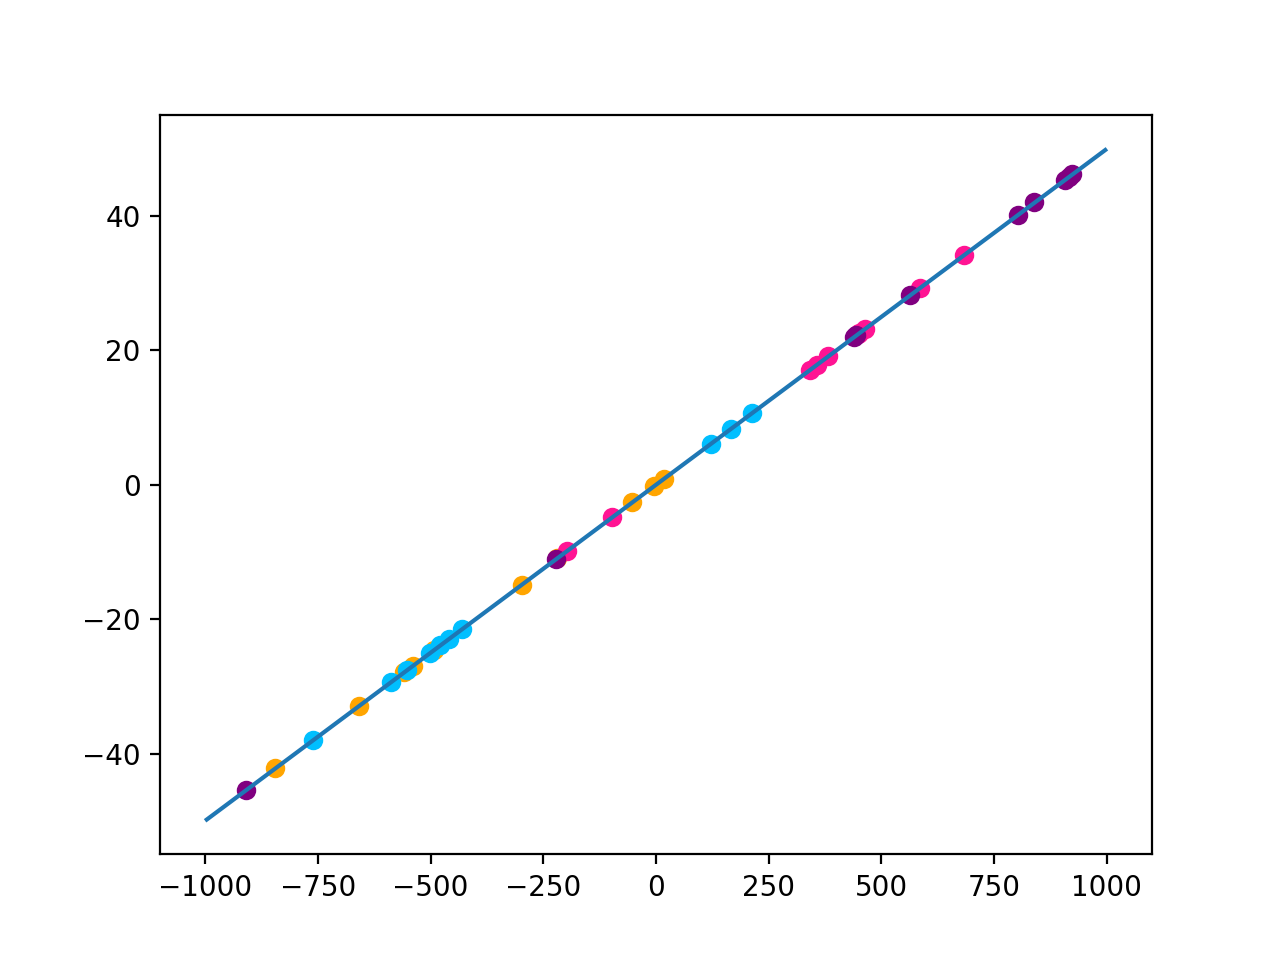

In [146]:
diff(a,b,set4, np.float64(0.0), det3, det4, 1000, 10)

### Uwagi 

Przy używaniu generatorów [ element for _ in range if condition] niektóre punkty były kwalifikowane do 2 grup przy małych eps.